## **Data Analysis**

**Input for our analysis:**
- **Angel - Startup relations**
- **Startup list** including Name, #of angel investors, industry, region
- **Angel list** including #of investments, name, region, average shares, number of investments per industry

**Steps of our analysis:**

1. **Creating a network graph**

2. **Descriptive Statistics** on:
   - _Angels_
   - _Startups_
   - _Network_

3. **Simulating a network graph with Null distribution**

4. **Community detection** in actual and simulated communities

5. **Analysis of similarity of communities** in terms of:
   - _Reach and Power_
   - _Investment Style_
   - _Personal Characteristics_

## Importing libraries and data - 0

In [10]:
#all libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import datetime


In [66]:
#all data sets
#open from csv the shareholder list as a dataframe

df_investment_rel_angel_startup = pd.read_csv("dataframes/shareholder_relations_2021_rows_cleaned.csv")
    #open from csv the shareholders as a dataframe
df_angels = pd.read_csv("dataframes/angels.csv",sep=";")
    #open from csv the startups as a dataframe
df_startups = pd.read_csv("dataframes/startups_rows.csv")


In [39]:
# #temp mutations
# def mutateAngels(df_angels):
# #prepare industry columns for industry_HHI

#     #rename column counts to number_of_investments
#     df_angels.rename(columns={'counts':'number_of_investments'}, inplace=True)
#     #convert format of number of investments to integer, where it fails, assign 1
#     df_angels['number_of_investments'] = pd.to_numeric(df_angels['number_of_investments'], errors='coerce').fillna(1).astype(int)

#     #ADD COLUMN "investment_entity" to df angel and randomly assign "holding" or "person"
#     df_angels['investment_entity'] = np.random.choice(['holding','person'], df_angels.shape[0])

#     #Assign random birth dates in daytime format to all df_angels
#     df_angels['date_of_birth'] = np.random.choice(pd.date_range(start='1/1/1950', end='1/1/2000', freq='D'), df_angels.shape[0])

#     #Assign random gender to the df_angels male and female
#     df_angels["gender"]=np.random.choice(["male",'female'], df_angels.shape[0])

#     #Assigna random value for total particpiation in startups between 0 and 0.15
#     df_angels['total_participation'] = np.random.uniform(0,0.15, df_angels.shape[0])


#     #Assign random value for industry_HHI between 0 and 1
#     df_angels['industry_HHI'] = np.random.uniform(0,1, df_angels.shape[0])

#     categories = [
#         "technology_digital_services",
#         "production_trade",
#         "energy_environment_infrastructure",
#         "services_consulting",
#         "healthcare"
#     ]


#     #Add a column for Eigenvector centrality and assign random value between 0 and 1
#     df_angels['eigenvector_centrality'] = np.random.uniform(0,1, df_angels.shape[0])

#     #Add a column for each industry in categorie
#     for cat in categories:
#         df_angels[cat] = np.random.choice([0,1,2,3], df_angels.shape[0])

#     #Add a columns with random values for location from the list (Berlin, Munich, Landshut, Hamburg, Cologne, Stuttgart)
#     locations = [
#         "Berlin",
#         "Munich",
#         "Landshut",
#         "Hamburg",
#         "Cologne",
#         "Stuttgart"
#     ]
#     df_angels['location'] = np.random.choice(locations, df_angels.shape[0])

#     #add per location a column {location}_investments" and assign random value between 0 and 1
#     #assign different probabilities for each location
#     df_angels['Berlin_investments'] = np.random.choice([0,1], df_angels.shape[0], p=[0.8, 0.2])
#     df_angels['Munich_investments'] = np.random.choice([0,1], df_angels.shape[0], p=[0.8, 0.2])
#     df_angels['Landshut_investments'] = np.random.choice([0,1], df_angels.shape[0], p=[0.8, 0.2])
#     df_angels['Hamburg_investments'] = np.random.choice([0,1], df_angels.shape[0], p=[0.8, 0.2])
#     df_angels['Cologne_investments'] = np.random.choice([0,1], df_angels.shape[0], p=[0.8, 0.2])
#     df_angels['Stuttgart_investments'] = np.random.choice([0,1], df_angels.shape[0], p=[0.8, 0.2])
    
#     #get columns of df_angels technology_digital_services, production_trade, energy_environment_infrastructure, services_consulting, healthcare
#     df_angels['technology_digital_services']=df_angels['technology_digital_services']/df_angels['number_of_investments']*100
#     df_angels['production_trade']=df_angels['production_trade']/df_angels['number_of_investments']*100
#     df_angels['energy_environment_infrastructure']=df_angels['energy_environment_infrastructure']/df_angels['number_of_investments']*100
#     df_angels['services_consulting']=df_angels['services_consulting']/df_angels['number_of_investments']*100
#     df_angels['healthcare']=df_angels['healthcare']/df_angels['number_of_investments']*100

#     df_angels['industry_HHI_angel']= df_angels[['technology_digital_services','production_trade','energy_environment_infrastructure','services_consulting','healthcare']].apply(lambda x: np.sum(np.square(x)), axis=1)


#     #assign a label to each angel in a new column "status", where you assign the label active if the angel has more than 2 investments
#     df_angels['status'] = df_angels['number_of_investments'].apply(lambda x: 'active' if x > 1 else 'inactive')
#     return df_angels


In [69]:
# def mutateSuInv_Relations(df_investment_rel_angel_startup,df_angels,df_startups):
#  #add a column called  "startup_location" and assign random value from the list (Berlin, Munich, Landshut, Hamburg, Cologne, Stuttgart)
#    locations = [
#         "Berlin",
#         "Munich",
#         "Landshut",
#         "Hamburg",
#         "Cologne",
#         "Stuttgart"
#     ]
#    df_investment_rel_angel_startup['startup_location'] = np.random.choice(locations, df_investment_rel_angel_startup.shape[0])

#     #now overwrite with the actual loction of the startup from df_startups

#     #pull in status into df_investment_rel_angel_startup from df_angels
#    df_investment_rel_angel_startup = df_investment_rel_angel_startup.merge(df_angels[['name','status']], left_on='name', right_on='name', how='left')
#     #pull in startup industry
#    df_investment_rel_angel_startup = df_investment_rel_angel_startup.merge(df_startups[['company','industry']], left_on='company', right_on='company', how='left')
#    return df_investment_rel_angel_startup
df_investment_rel_angel_startup

,Unnamed: 0,shareholder_id,created_at,shareholder_name,number_of_investments,shareholder_type,birthdate,register_id,register_court,total_participation,register_mapping,shareholder_purpose,link_structured_content_file_current,gender,firstname,lastname,list_mds,shareholder_location
0,19,44,2024-03-07 14:25:38.129951+00,GRAMCO GmbH,1,angel,1956-10-27,HR B 767157,Stuttgart,100.0000,95.0,"{""shareholder_purpose"": ""Das Halten und Verwal...",GRAMCO GmbH_Stuttgart_HRB 767157/SI-GRAMCO Gmb...,Female,Elisabeth Anna,Grammling,1.0,NaN
1,20,54,2024-03-07 14:25:38.129951+00,Increaze Venture GmbH,1,angel,1997-07-08,HRB 260587,München,9.0000,136.0,"{""shareholder_purpose"": ""Erwerb, das Halten un...",Increaze Venture GmbH_Mnchen_HRB 260587/SI-Inc...,Male,Jason,Modemann,2.0,NaN
2,21,47,2024-03-07 14:25:38.129951+00,CABO Ventures UG (haftungsbeschränkt),1,angel,1993-07-04,HRB 777267,Stuttgart,30.0000,95.0,"{""shareholder_purpose"": ""Halten von Unternehme...",CABO Ventures UG haftungsbeschrnkt_Stuttgart_H...,Male,Pascal,Salmen,1.0,NaN
3,22,51,2024-03-07 14:25:38.129951+00,MGH Beratungs- und Beteiligungs- GmbH,4,angel,1966-03-26,HRB 23398,Wiesbaden,14.8417,335.0,"{""shareholder_purpose"": ""Erbringung von Untern...",MGH Beratungs und BeteiligungsGmbH_Wiesbaden_H...,Male,Matthias,Helfrich,1.0,NaN
4,23,42,2024-03-07 14:25:38.129951+00,Pointguard Ventures GmbH,4,angel,1966-08-14,HRB 24536,Bonn,0.4500,557.0,"{""shareholder_purpose"": ""die Verm\u00f6gensver...",Pointguard Ventures GmbH_Bonn_HRB 24536/SI-Poi...,Male,Marc,Stilke,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,22557,1250,2024-03-07 14:25:38.129951+00,Pineapple Ventures UG (haftungsbeschränkt) AG ...,2,angel,1994-09-30,HRB 38701,Nürnberg,NaN,172.0,"{""shareholder_purpose"": ""die Verwaltung eigene...",Pineapple Ventures UG haftungsbeschrnkt_Nrnber...,Male,Tom,Krüger,1.0,NaN
3758,22558,1333,2024-03-07 14:25:38.129951+00,intervest GmbH,1,angel,1985-02-02,HRB 133051,Hamburg,100.0000,261.0,"{""shareholder_purpose"": ""Gegenstand des Untern...",intervest GmbH_Hamburg_HRB 133051/SI-intervest...,Male,Sebastian,Angermeyer,1.0,NaN
3759,22561,1385,2024-03-07 14:25:38.129951+00,Cerious Ventures GmbH,1,angel,1989-01-04,HRB 164050,Hamburg,NaN,261.0,"{""shareholder_purpose"": ""Gegenstand des Untern...",Cerious Ventures GmbH_Hamburg_HRB 164050/SI-Ce...,Male,Christopher Julian,Ernst,1.0,NaN
3760,22562,1321,2024-03-07 14:25:38.129951+00,AMEA Invest UG (haftungsbeschränkt),1,angel,1989-10-31,HRB 264664,München,NaN,136.0,"{""shareholder_purpose"": ""Erwerb, das Halten, d...",AMEA Invest UG haftungsbeschrnkt_Mnchen_HRB 26...,Male,Richard,Fischer,1.0,NaN


In [72]:
# df_investment_rel_angel_startup, df_angels, df_startups = loadData()
# df_startups = mutateStartups(df_startups)
# df_angels = mutateAngels(df_angels)
# df_investment_rel_angel_startup = mutateSuInv_Relations(df_investment_rel_angel_startup,df_angels,df_startups)
df_angels
#get all rows from df_angels where list_mds is 1 or 2
df_angels[df_angels['list_mds'].isin([1,2])]

,Unnamed: 0,shareholder_id,created_at,shareholder_name,number_of_investments,shareholder_type,birthdate,register_id,register_court,total_participation,register_mapping,shareholder_purpose,link_structured_content_file_current,gender,firstname,lastname,list_mds,shareholder_location
0,19,44,2024-03-07 14:25:38.129951+00,GRAMCO GmbH,1,angel,1956-10-27,HR B 767157,Stuttgart,100.0000,95.0,"{""shareholder_purpose"": ""Das Halten und Verwal...",GRAMCO GmbH_Stuttgart_HRB 767157/SI-GRAMCO Gmb...,Female,Elisabeth Anna,Grammling,1.0,NaN
1,20,54,2024-03-07 14:25:38.129951+00,Increaze Venture GmbH,1,angel,1997-07-08,HRB 260587,München,9.0000,136.0,"{""shareholder_purpose"": ""Erwerb, das Halten un...",Increaze Venture GmbH_Mnchen_HRB 260587/SI-Inc...,Male,Jason,Modemann,2.0,NaN
2,21,47,2024-03-07 14:25:38.129951+00,CABO Ventures UG (haftungsbeschränkt),1,angel,1993-07-04,HRB 777267,Stuttgart,30.0000,95.0,"{""shareholder_purpose"": ""Halten von Unternehme...",CABO Ventures UG haftungsbeschrnkt_Stuttgart_H...,Male,Pascal,Salmen,1.0,NaN
3,22,51,2024-03-07 14:25:38.129951+00,MGH Beratungs- und Beteiligungs- GmbH,4,angel,1966-03-26,HRB 23398,Wiesbaden,14.8417,335.0,"{""shareholder_purpose"": ""Erbringung von Untern...",MGH Beratungs und BeteiligungsGmbH_Wiesbaden_H...,Male,Matthias,Helfrich,1.0,NaN
4,23,42,2024-03-07 14:25:38.129951+00,Pointguard Ventures GmbH,4,angel,1966-08-14,HRB 24536,Bonn,0.4500,557.0,"{""shareholder_purpose"": ""die Verm\u00f6gensver...",Pointguard Ventures GmbH_Bonn_HRB 24536/SI-Poi...,Male,Marc,Stilke,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,22557,1250,2024-03-07 14:25:38.129951+00,Pineapple Ventures UG (haftungsbeschränkt) AG ...,2,angel,1994-09-30,HRB 38701,Nürnberg,NaN,172.0,"{""shareholder_purpose"": ""die Verwaltung eigene...",Pineapple Ventures UG haftungsbeschrnkt_Nrnber...,Male,Tom,Krüger,1.0,NaN
3758,22558,1333,2024-03-07 14:25:38.129951+00,intervest GmbH,1,angel,1985-02-02,HRB 133051,Hamburg,100.0000,261.0,"{""shareholder_purpose"": ""Gegenstand des Untern...",intervest GmbH_Hamburg_HRB 133051/SI-intervest...,Male,Sebastian,Angermeyer,1.0,NaN
3759,22561,1385,2024-03-07 14:25:38.129951+00,Cerious Ventures GmbH,1,angel,1989-01-04,HRB 164050,Hamburg,NaN,261.0,"{""shareholder_purpose"": ""Gegenstand des Untern...",Cerious Ventures GmbH_Hamburg_HRB 164050/SI-Ce...,Male,Christopher Julian,Ernst,1.0,NaN
3760,22562,1321,2024-03-07 14:25:38.129951+00,AMEA Invest UG (haftungsbeschränkt),1,angel,1989-10-31,HRB 264664,München,NaN,136.0,"{""shareholder_purpose"": ""Erwerb, das Halten, d...",AMEA Invest UG haftungsbeschrnkt_Mnchen_HRB 26...,Male,Richard,Fischer,1.0,NaN


In [43]:
#assign angels the active status if the hace more than 1 investments
df_angels['status'] = df_angels['number_of_investments'].apply(lambda x: 'active' if x > 1 else 'inactive')
df_angels

df_angels_active = df_angels[df_angels['status'] == 'active']
df_angels_active


,Unnamed: 0,shareholder_id,created_at,shareholder_name,number_of_investments,shareholder_type,birthdate,register_id,register_court,total_participation,register_mapping,shareholder_purpose,link_structured_content_file_current,gender,firstname,lastname,list_mds,shareholder_location,status
3,22,51,2024-03-07 14:25:38.129951+00,MGH Beratungs- und Beteiligungs- GmbH,4,angel,1966-03-26,HRB 23398,Wiesbaden,14.8417,335.0,"{""shareholder_purpose"": ""Erbringung von Untern...",MGH Beratungs und BeteiligungsGmbH_Wiesbaden_H...,Male,Matthias,Helfrich,1.0,NaN,active
4,23,42,2024-03-07 14:25:38.129951+00,Pointguard Ventures GmbH,4,angel,1966-08-14,HRB 24536,Bonn,0.4500,557.0,"{""shareholder_purpose"": ""die Verm\u00f6gensver...",Pointguard Ventures GmbH_Bonn_HRB 24536/SI-Poi...,Male,Marc,Stilke,1.0,NaN,active
11,43,71,2024-03-07 14:25:38.129951+00,KUWI KG,2,angel,1966-12-30,HRA 120309,Hamburg,NaN,261.0,"{""shareholder_purpose"": null}",KUWI KG_Hamburg_HRA 120309/SI-KUWI KG.xml,Female,Doris,Kunz,2.0,NaN,active
12,44,68,2024-03-07 14:25:38.129951+00,REBIZ UG (haftungsbeschränkt),2,angel,1969-09-30,AG Köln HRB 91226,Köln,100.0000,568.0,"{""shareholder_purpose"": ""die Beteiligung an Un...",REBIZ UG haftungsbeschrnkt_Kln_HRB 91226/SI-RE...,Male,Philipp,Butzbach,1.0,NaN,active
13,45,78,2024-03-07 14:25:38.129951+00,ID Ventures GmbH,2,angel,1984-06-19,HRB 8040,Gießen,NaN,297.0,"{""shareholder_purpose"": ""Die Verwaltung eigene...",ID Ventures GmbH_Gieen_HRB 8040/SI-ID Ventures...,Male,Klaus,Wegener,1.0,NaN,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3736,22533,1153,2024-03-07 14:25:38.129951+00,Felior UG (haftungsbeschränkt),2,angel,1973-08-15,HRB 779612,Stuttgart,NaN,95.0,"{""shareholder_purpose"": ""Das Eingehen und Halt...",Felijo UG haftungsbeschrnkt_Stuttgart_HRB 7796...,Male,Gerrit,Michelfelder,1.0,NaN,active
3739,22536,1082,2024-03-07 14:25:38.129951+00,JDoing GmbH,2,angel,1982-12-19,HRB 761612,Stuttgart,25.0000,95.0,"{""shareholder_purpose"": ""Erbringung von Dienst...",JDoing GmbH_Stuttgart_HRB 761612/SI-JDoing Gmb...,Male,Julian,Dörreich,1.0,NaN,active
3742,22539,1133,2024-03-07 14:25:38.129951+00,WAPP GmbH,3,angel,1987-10-02,HRB 42426,Bielefeld,7.5000,480.0,"{""shareholder_purpose"": ""Die Beratung, Konzept...",WAPP GmbH_Bielefeld_HRB 42426/SI-WAPP GmbH.xml,Male,Malte,Burkert,2.0,NaN,active
3748,22546,1157,2024-03-07 14:25:38.129951+00,ANVIG GmbH,2,angel,1966-03-01,HRB 27642,Essen,NaN,507.0,"{""shareholder_purpose"": ""Das Eingehen und Halt...",ANVIG GmbH_Essen_HRB 27642/SI-ANVIG GmbH.xml,Male,Arndt Hendrik,Neuhaus,1.0,NaN,active


In [44]:
df_investment_rel_angel_startup
#return all occurences of Herr_Andreas Keller
df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name'] == 'Herr Andreas Keller']
# drop duplicates from df_investment_rel_angel_startup where shareholder_name_mapped and startup_id are the same
df_investment_rel_angel_startup = df_investment_rel_angel_startup.drop_duplicates(subset=['shareholder_name_mapped','startup_id'])
df_investment_rel_angel_startup

,relation_id,created_at,shareholder_name,shareholder_location,birthdate,register_id,register_court,percentage_of_total_shares,shareholder_type,startup_name,shareholder_country,openai_result,startup_id,register_mapping,shareholder_name_mapped
0,553,2024-02-29 16:45:49.495019+00,Robotics Consulting GmbH,Fürstenfeldbruck,NaN,HRB 263605,München,0.26,NaN,COBOWORX GmbH,Germany,NaN,7292,136.0,Robotics Consulting GmbH
1,555,2024-02-29 16:46:29.925792+00,Nero Holding GmbH,Frankfurt am Main,NaN,HRB 124717,Frankfurt am Main,100.0,NaN,MA Nero GmbH,Germany,NaN,11896,281.0,Nero Holding GmbH
2,2215,2024-02-29 17:01:40.470034+00,Venture Stars Pooling UG (haftungsbeschränkt),München,NaN,HRB 196930,München,0.3379,NaN,Finoa GmbH,Germany,NaN,8184,136.0,NaN
3,974,2024-02-29 16:49:33.502778+00,AL Holding UG (haftungsbeschränkt),Meerbusch,NaN,HRB 19211,Neuss,NaN,NaN,Yard GmbH,Germany,NaN,12847,442.0,NaN
4,1547,2024-02-29 16:55:35.338603+00,CK Ventures GmbH,Leipzig,NaN,HR B 32433,Leipzig,4.0,NaN,CROWDBUILDING Technology GmbH,Germany,NaN,5043,649.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25079,28976,2024-03-01 10:44:18.977112+00,Piton Capital III Investments Cooperatief B.A.,Amsterdam,NaN,68629400,Uittreksel Handelsregsiter Kamer van Koophande...,15.8004,NaN,xChange Solutions GmbH,Netherlands,NaN,12699,NaN,Piton Capital III Investments Cooperatief B.A.
25080,29072,2024-03-01 10:45:07.962092+00,Marianne Lucie Höger,Hamburg,1990-05-06,NaN,NaN,50.0,NaN,LIQUID GRAPE GmbH,Germany,NaN,7237,NaN,Marianne Lucie Höger
25081,29083,2024-03-01 10:45:17.367522+00,Sebastian Rockendorf,Rellingen,1984-03-28,NaN,NaN,50.0,NaN,Muchachoo GmbH,Germany,NaN,14057,NaN,Sebastian Rockendorf
25082,29153,2024-03-01 10:45:58.419407+00,GmbH,NaN,NaN,NaN,NaN,NaN,NaN,Jellyway GmbH,Germany,NaN,7047,NaN,GmbH


## Creating a Network Graph - 1

In [55]:
# get a list of co-investments
#get subset of df_investment_rel_angel_startup where shareholder_name_mapped is part of df_angels_active
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'].isin(df_angels_active['shareholder_name'])]

# Create a new DataFrame where each row represents a co-investment
co_investments = df_investment_rel_angel_startup.merge(df_investment_rel_angel_startup, on='startup_name')

# Filter out rows where the investor is the same in both columns
co_investments = co_investments[co_investments['shareholder_name_x'] != co_investments['shareholder_name_y']]

# # Create a table with the number of co-investments for each pair of investors
co_investment_counts = co_investments.groupby(['shareholder_name_x', 'shareholder_name_y']).size().reset_index(name='CoInvestments')

#replace all spaces with _ in shareholder_name_x
co_investment_counts['shareholder_name_x'] = co_investment_counts['shareholder_name_x'].str.replace(' ', '_')
co_investment_counts['shareholder_name_y'] = co_investment_counts['shareholder_name_y'].str.replace(' ', '_')

#co_investment_counts.to_csv('co_investment_counts.csv', index=False)

#sort by number of co-investments
co_investment_counts = co_investment_counts.sort_values(by=['CoInvestments'], ascending=False)
co_investment_counts

,shareholder_name_x,shareholder_name_y,CoInvestments
463,Picus_Capital_GmbH,Sebastian_Schuon_Investments_GmbH,4
567,Sebastian_Schuon_Investments_GmbH,Picus_Capital_GmbH,4
411,Mücke_Ventures_GmbH,Mücke_Roth_&_Company_GmbH,3
692,huesmann_Punkt_GmbH,S.W._Projects_GmbH,3
540,S.W._Projects_GmbH,NP_Projects_GmbH,3
...,...,...,...
255,HDLF_Family_Affairs_GmbH,Monday_Invest_GmbH,1
256,HDLF_Family_Affairs_GmbH,Mücke_Ventures_GmbH,1
257,HDLF_Family_Affairs_GmbH,Penguin_Holding_GmbH,1
258,HGVL_Beteiligungen_GmbH,ANVIG_GmbH,1


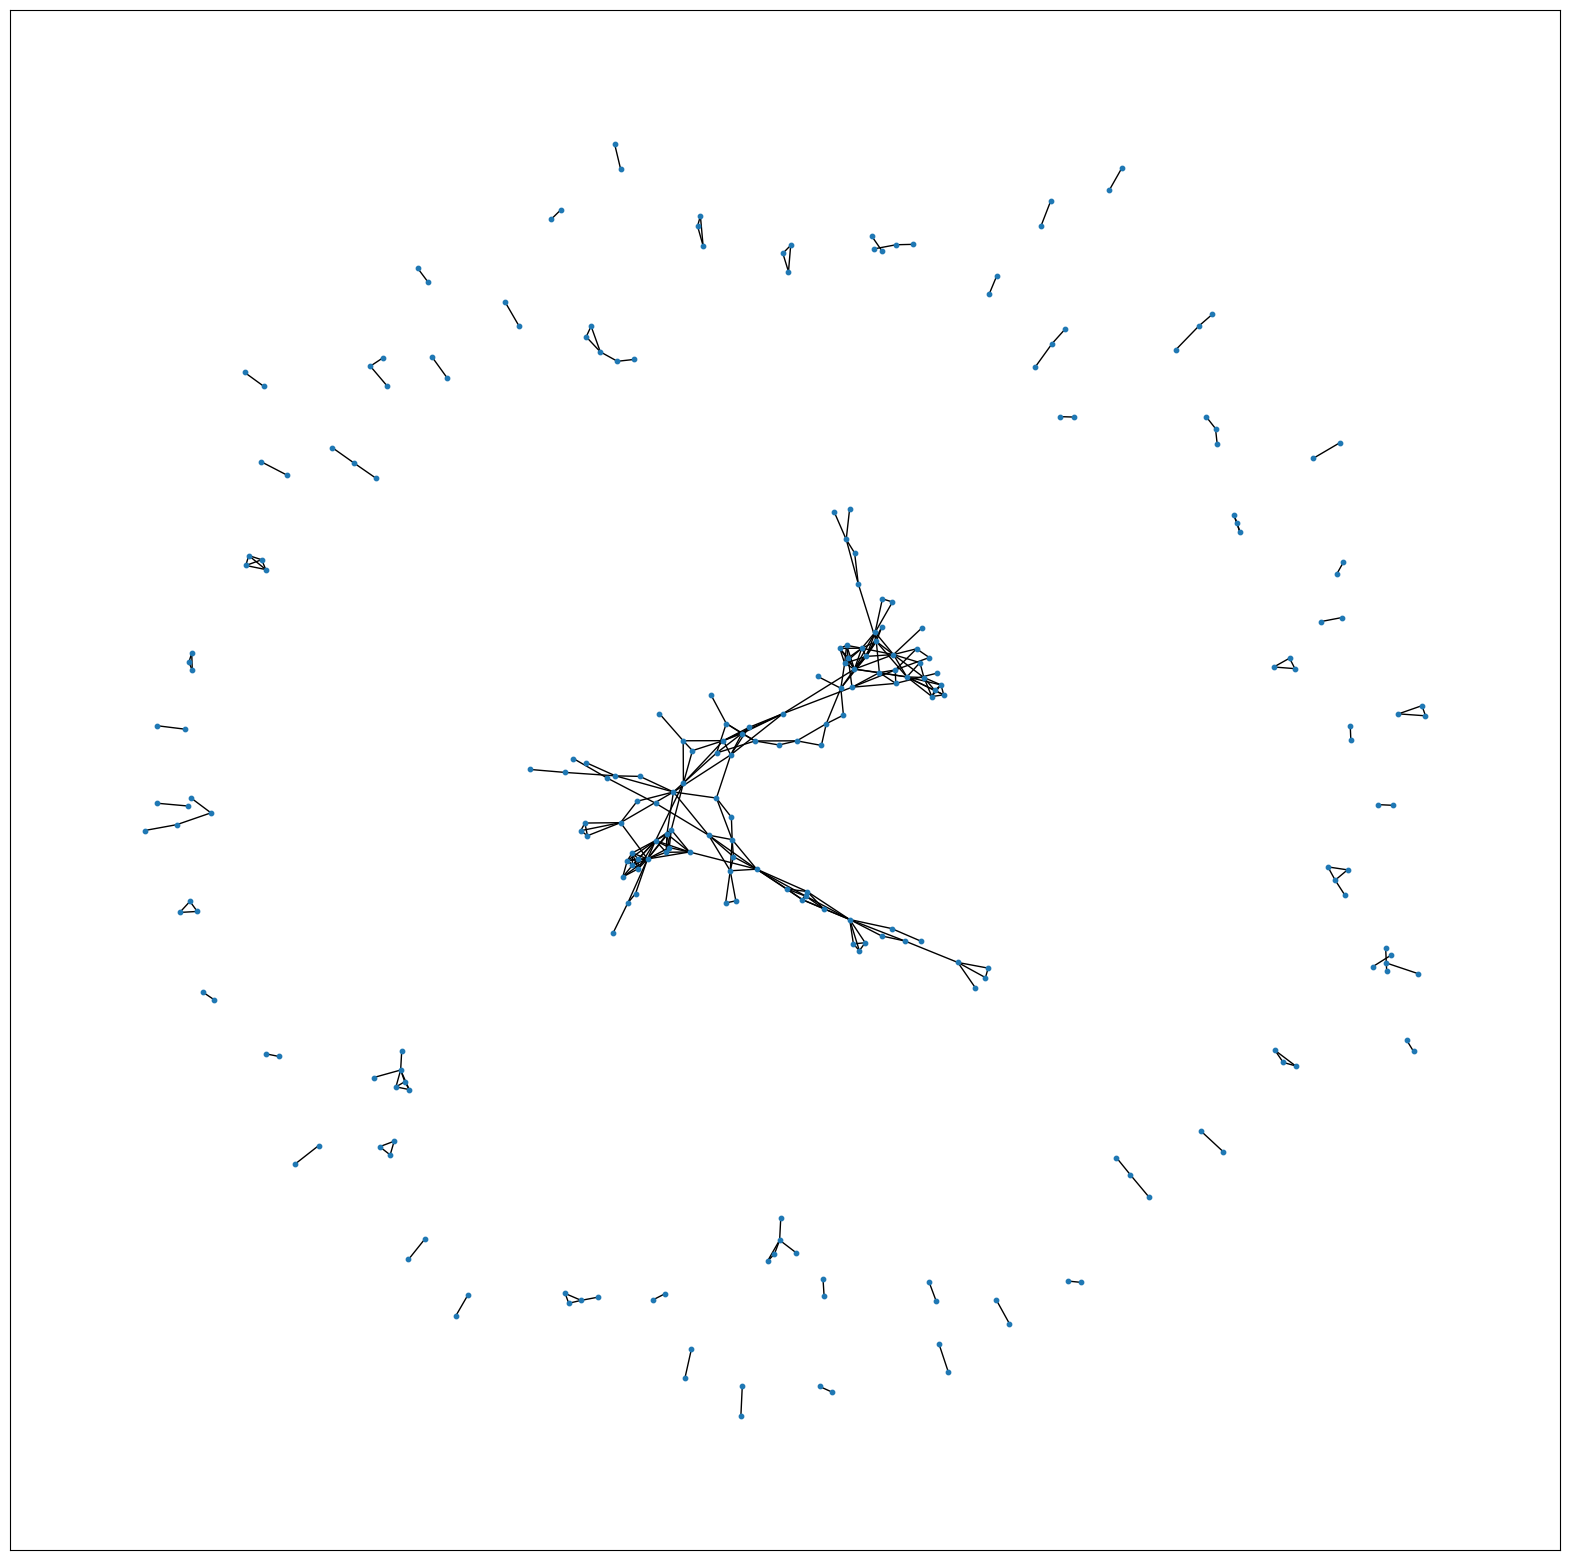

In [56]:
# Create a graph from the co_investment_counts DataFrame
#get subset where co-investments >1
# co_investment_counts = co_investment_counts[co_investment_counts['CoInvestments'] > 1]
G = nx.from_pandas_edgelist(co_investment_counts, 'shareholder_name_x', 'shareholder_name_y', ['CoInvestments'])

# Draw the graph
pos = nx.spring_layout(G)
#make the graph bigger
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos, with_labels=False, node_size=10, edge_color='black')
#add a heatmap
#nx.draw_networkx_edge_labels(G, pos, edge_labels=co_investment_counts['Distance'])

plt.show()


In [63]:
import pandas as pd
from d3graph import d3graph, vec2adjmat
source = co_investment_counts['shareholder_name_x']
target = co_investment_counts['shareholder_name_y']
weight = co_investment_counts['CoInvestments']


adjmat = vec2adjmat(source, target, weight=weight)
print(adjmat)
# Initialize
d3 = d3graph()

d3.graph(adjmat)
# save as graph.html in dataframes
d3.show('dataframes/graph.html')
# Additional customization for interactivity


# Convert to html and open in the browser
d3.show(filepath='output/graph.html')


[d3graph] INFO> Converting source-target into adjacency matrix..
[d3graph] INFO> Making the matrix symmetric..
[d3graph] INFO> Set directed=True to see the markers!
[d3graph] INFO> Keep only edges with weight>0
[d3graph] INFO> Converting source-target into adjacency matrix..
[d3graph] INFO> Making the matrix symmetric..
[d3graph] INFO> Converting adjacency matrix into source-target..
[d3graph] WARNING> Colormap [Set2] can not create [68] unique colors! Available unique colors: [8].
[d3graph] INFO> Number of unique nodes: 265
[d3graph] INFO> Slider range is set to [0, 4]
[d3graph] INFO> Write to path: [/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/tmpiny7h022/d3graph.html]
[d3graph] INFO> File already exists and will be overwritten: [/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/tmpiny7h022/d3graph.html]


target                                              4L_Vision_GmbH_mit_Sitz_in_Karlsruhe  \
source                                                                                     
4L_Vision_GmbH_mit_Sitz_in_Karlsruhe                                                 0.0   
7gen_Holdings_GmbH                                                                   0.0   
9elements_Holding_GmbH                                                               0.0   
ALLUTI_GmbH                                                                          0.0   
ANVIG_GmbH                                                                           0.0   
...                                                                                  ...   
procentauri_Beteiligungs-_und_Verwaltungsgesell...                                   0.0   
quango_Ventures_GmbH                                                                 0.0   
r.digital_GmbH                                                                  

[d3graph] INFO> Slider range is set to [0, 4]
[d3graph] INFO> Write to path: [/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/output/graph.html]
[d3graph] INFO> File already exists and will be overwritten: [/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/output/graph.html]


## **Descriptive Statistics** - 2

Descriptive Statistics on Angels

In [47]:
df_angel_descriptive = pd.DataFrame(columns=("variable","value"))

#Calulate total number of angels and add to df_angel_descriptive with variable name "total_number_of_angels"
total_number_of_angels = len(df_angels)
df_angel_descriptive.loc[0] = ["total_number_of_angels", total_number_of_angels]
#Calculate the amount of males among the angels
number_of_male_angels_total = len(df_angels[df_angels['gender'] == 'male'])
df_angel_descriptive.loc[1] = ["number_of_male_angels", number_of_male_angels_total]
#Calculate the amount of females among all angels
number_of_female_angels_total = len(df_angels[df_angels['gender'] == 'female'])
df_angel_descriptive.loc[2] = ["number_of_female_angels", number_of_female_angels_total]

#Calulate total number of active angels and add to df_angel_descriptive with variable name "total_number_of_active_angels"
total_number_of_active_angels = len(df_angels[df_angels['status'] == 'active'])
df_angel_descriptive.loc[3] = ["total_number_of_active_angels", total_number_of_active_angels]

#only consider active angels
df_angels = df_angels[df_angels['status'] == 'active']

#Calculate number of angels investing through a holding and add to df_angel_descriptive with variable name "number_of_angels_investing_through_a_holding"
number_of_angels_investing_through_a_holding = len(df_angels[df_angels['investment_entity'] == 'holding'])
# add them to df
df_angel_descriptive.loc[4] = ["number_of_angels_investing_through_a_holding", number_of_angels_investing_through_a_holding]

#Calculate number of angels investing as a person and add to df_angel_descriptive with variable name "number_of_angels_investing_as_a_person"
number_of_angels_investing_as_a_person = len(df_angels[df_angels['investment_entity'] == 'person'])
# add them to df
df_angel_descriptive.loc[5] = ["number_of_angels_investing_as_a_person", number_of_angels_investing_as_a_person]

#share of investments through holding and add to df_angel_descriptive with variable name "share_of_investments_through_holding"
share_of_investments_through_holding = number_of_angels_investing_through_a_holding/total_number_of_active_angels
# add them to df
df_angel_descriptive.loc[6] = ["share_of_investments_through_holding", share_of_investments_through_holding]

# calculate age based on birthdate and add to df_angel
df_angels['date_of_birth'] = pd.to_datetime(df_angels['date_of_birth'])
date = datetime(2021,12,31)
df_angels['age'] =((date - df_angels['date_of_birth']).dt.days)/365
#calculate mean age of angels and add to df_angel_descriptive with variable name "mean_age_of_angels"
mean_age_of_angels = df_angels['age'].mean()
# add them to df
df_angel_descriptive.loc[7] = ["mean_age_of_angels", mean_age_of_angels]

#Calculate the amount of males among the active angels
number_of_male_angels_active = len(df_angels[df_angels['gender'] == 'male'])
df_angel_descriptive.loc[8] = ["number_of_male_angels", number_of_male_angels_active]

#Calculate the amount of females among the active angels
number_of_female_angels_active = len(df_angels[df_angels['gender'] == 'female'])
df_angel_descriptive.loc[9] = ["number_of_female_angels", number_of_female_angels_active]

#Calculate average number of investment per active angel and add to df_angel_descriptive with variable name "average_number_of_investments_per_active_angel"
average_number_of_investments_per_active_angel = df_angels['number_of_investments'].mean()
# add them to df
df_angel_descriptive.loc[10] = ["average_number_of_investments_per_active_angel", average_number_of_investments_per_active_angel]

#Calculate median number of investment per active angel and add to df_angel_descriptive with variable name "median_number_of_investments_per_active_angel"
median_number_of_investments_per_active_angel = df_angels['number_of_investments'].median()
# add them to df
df_angel_descriptive.loc[11] = ["median_number_of_investments_per_active_angel", median_number_of_investments_per_active_angel]

#Calculate average inustry_HHI per active angel and add to df_angel_descriptive with variable name "average_inustry_HHI_per_active_angel"
average_inustry_HHI = df_angels['industry_HHI'].mean()
# add them to df
df_angel_descriptive.loc[12] = ["average_industry_HHI", average_inustry_HHI]

#Calculate average industry HHI across angels and add to df_angel_descriptive with variable name "average_industry_HHI_across_angels"
average_industry_HHI_across_angels = df_angels['industry_HHI_angel'].mean()
# add them to df
df_angel_descriptive.loc[13] = ["average_industry_HHI_across_angels", average_industry_HHI_across_angels]

#Calculate average eigenvector centrality across angels and add to df_angel_descriptive with variable name "average_eigenvector_centrality_across_angels"
average_eigenvector_centrality_across_angels = df_angels['eigenvector_centrality'].mean()
# add them to df
df_angel_descriptive.loc[14] = ["average_eigenvector_centrality_across_angels", average_eigenvector_centrality_across_angels]

df_angel_descriptive

KeyError: 'investment_entity'

In [46]:
df_angels

,name,number_of_investments,gender,location,total_participation,date_of_birth,label,registry_details,Unnamed: 8,Unnamed: 9,...,healthcare,Berlin_investments,Munich_investments,Landshut_investments,Hamburg_investments,Cologne_investments,Stuttgart_investments,industry_HHI_angel,status,age
0,PK Projects GmbH,3,female,Hamburg,0.034040,1957-09-27,Angel,HRB 117075 B,NaN,NaN,...,66.666667,1,0,0,0,0,0,25555.555556,active,64.304110
1,Bayern Kapital Innovationsfonds EFRE GmbH & Co...,3,female,Landshut,0.139842,1996-09-06,VC,"AG Landshut, HRA 11166, Landshut",NaN,NaN,...,100.000000,0,1,0,1,0,0,21111.111111,active,25.334247
2,Alvio GmbH,3,male,Berlin,0.002100,1995-08-29,Angel,"AG Charlottenburg, HRB 181047 B",NaN,NaN,...,33.333333,0,0,0,0,1,1,11111.111111,active,26.358904
3,Rivus Ventures GmbH,2,male,Cologne,0.055710,1957-12-17,Angel,"Munchen, AG / local court of Munchen, HRB 267225",NaN,NaN,...,150.000000,1,0,0,0,0,0,50000.000000,active,64.082192
4,Mercutio GmbH,2,male,Stuttgart,0.062041,1994-11-21,founder,HRB 107123,NaN,NaN,...,50.000000,0,0,1,0,0,1,15000.000000,active,27.128767
5,AKVaganza Unternehmergesellschaft (haftungsbes...,2,male,Landshut,0.101810,1961-09-05,founder,Amtsgericht Diisseldorf HRB 75419,NaN,NaN,...,50.000000,1,1,0,0,0,0,55000.000000,active,60.361644
6,ROMM Holding GmbH,2,male,Berlin,0.121399,1975-12-27,VC,HRB 145775,NaN,NaN,...,150.000000,0,1,0,0,0,1,35000.000000,active,46.043836
7,Roskopf Ventures GmbH,2,female,Landshut,0.047736,1993-07-15,Angel,HRB 126690,NaN,NaN,...,50.000000,1,0,1,0,1,0,12500.000000,active,28.482192
8,WENVEST Capital GmbH,2,male,Hamburg,0.082898,1992-11-15,founder,NaN,NaN,NaN,...,100.000000,0,0,0,0,1,0,22500.000000,active,29.145205
9,Atlantic Food Labs Vintage GmbH & Co. KG,2,male,Landshut,0.094494,1963-08-02,VC,"AG Charlottenburg, HRA 58995 B",NaN,NaN,...,150.000000,0,0,0,0,1,0,60000.000000,active,58.454795


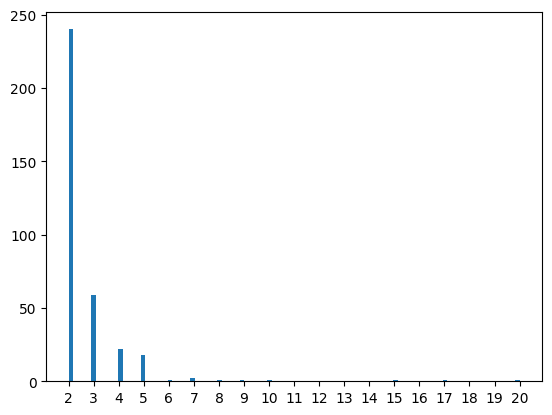

In [48]:
#Plot distribution of number of investments per angel
plt.hist(df_angels['number_of_investments'], bins=100)
# only plot whole numbers on x-axis
plt.xticks(np.arange(min(df_angels['number_of_investments']), max(df_angels['number_of_investments'])+1, 1.0))
#export to png as "Number of investments.png"
plt.savefig('graphs/Distribution of number of investments.png')


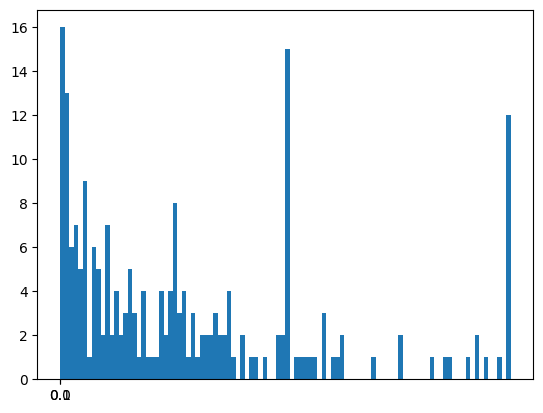

In [49]:
#plot distribution of average shares in their investments including decimals
plt.hist(df_angels['total_participation'], bins=100)
# plot also decimals on X-axis from 0 to 0.2
plt.xticks(np.arange(0, 0.2, 0.1))
#export to png as "Distribution of average shares of angels.png"
plt.savefig('graphs/Distribution of average shares of angels.png')


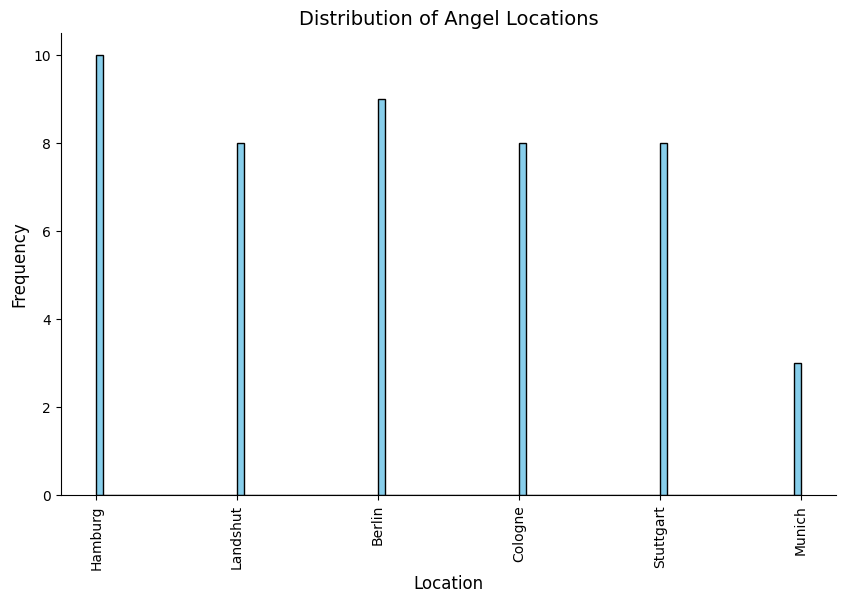

<Figure size 640x480 with 0 Axes>

In [49]:
import matplotlib.pyplot as plt

# Drop NaN values
data = df_angels['location'].dropna()

# Set the figure size
plt.figure(figsize=(10,6))

# Plot the histogram with a color
plt.hist(data, bins=100, color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Distribution of Angel Locations', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Remove top and right spines for aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()

#export graph as image called "Number of angels per region.png"
plt.savefig('graphs/Number of angels per region.png')

## Descriptive Statistics on Startups

In [50]:
# Calculate descriptive statistics for strtups from df_startups, add to df_startup_descriptive
# we want to calculate the following variables:
# total_number_of_startups
#average number of angel investors
#median number of angel investors
#average number of active angels
#median number of active angels

df_startup_descriptive = pd.DataFrame(columns=("variable","value"))

#Calulate total number of startups and add to df_startup_descriptive with variable name "total_number_of_startups"
total_number_of_startups = len(df_startups)
df_startup_descriptive.loc[0] = ["total_number_of_startups", total_number_of_startups]

#Calulate average number of angel investors and add to df_startup_descriptive with variable name "average_number_of_angel_investors"
average_number_of_angel_investors = df_startups['number_of_investors'].mean()
df_startup_descriptive.loc[1] = ["average_number_of_angel_investors", average_number_of_angel_investors]

#Calulate median number of angel investors and add to df_startup_descriptive with variable name "median_number_of_angel_investors"
median_number_of_angel_investors = df_startups['number_of_investors'].median()
df_startup_descriptive.loc[2] = ["median_number_of_angel_investors", median_number_of_angel_investors]

#Calulate average number of active angels and add to df_startup_descriptive with variable name "average_number_of_active_angels"
average_number_of_angels = df_startups['number_of_angels'].mean()
df_startup_descriptive.loc[3] = ["average_number_of_angels", average_number_of_angels]

#Calulate median number of active angels and add to df_startup_descriptive with variable name "median_number_of_active_angels"
median_number_of_angels = df_startups['number_of_angels'].median()
df_startup_descriptive.loc[4] = ["median_number_of_angels", median_number_of_angels]

#Calulate average number of active angels and add to df_startup_descriptive with variable name "average_number_of_active_angels"
average_number_of_active_angels = df_startups['number_of_active_angels'].mean()
df_startup_descriptive.loc[5] = ["average_number_of_active_angels", average_number_of_active_angels]

#Calulate median number of active angels and add to df_startup_descriptive with variable name "median_number_of_active_angels"
median_number_of_active_angels = df_startups['number_of_active_angels'].median()
df_startup_descriptive.loc[6] = ["median_number_of_active_angels", median_number_of_active_angels]


df_startup_descriptive



,variable,value
0,total_number_of_startups,135.000000
1,average_number_of_angel_investors,7.666667
2,median_number_of_angel_investors,4.000000
3,average_number_of_angels,1.911111
4,median_number_of_angels,2.000000
5,average_number_of_active_angels,2.014815
6,median_number_of_active_angels,2.000000


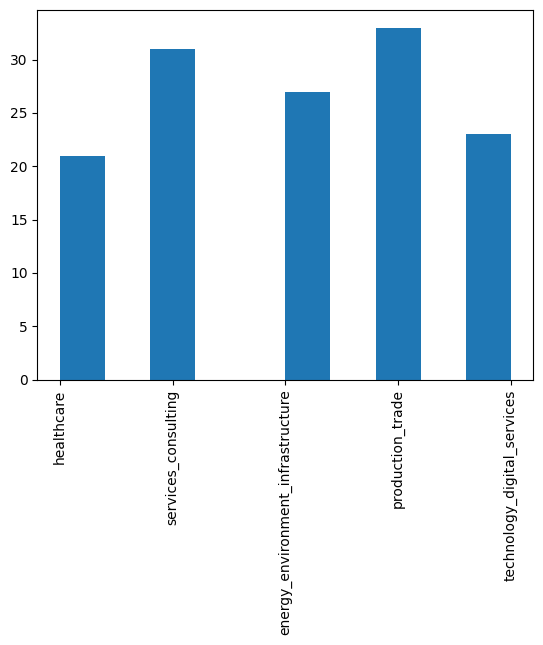

In [51]:
#Plot startups per industry
plt.hist(df_startups['industry'], bins=10)
#plot all industries
plt.xticks(rotation=90)

#export graph as image called "Number of Startups per Industry.png"
plt.savefig('graphs/Number of Startups per Industry.png')

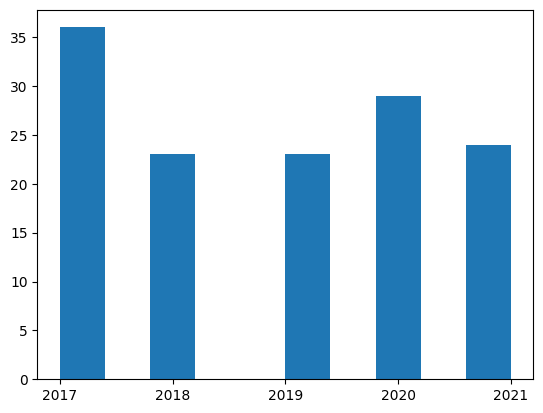

In [52]:
#Plot startups per year of incorporation
plt.hist(df_startups['year_of_incorporation'], bins=10)
#plot all years, make 1 year jumps, no decimals, make the bars thicker
plt.xticks(np.arange(min(df_startups['year_of_incorporation']), max(df_startups['year_of_incorporation'])+1, 1.0))

#export graph as image called "Number of Startups per Year of Incorporation.png"
plt.savefig('graphs/Number of Startups per Year of Incorporation.png')

## Network metrics



In [53]:
#Cosntruct a network graph of only the active angels
# get a list of co-investments

#only consider active angels in df_investment_rel_angel_startup
#match status from df_angels to df_investment_rel_angel_startup

# Create a new DataFrame where each row represents a co-investment
co_investments = df_investment_rel_angel_startup.merge(df_investment_rel_angel_startup, on='company')

# Filter out rows where the investor is the same in both columns
co_investments = co_investments[co_investments['name_x'] != co_investments['name_y']]

# # Create a table with the number of co-investments for each pair of investors
co_investment_counts = co_investments.groupby(['name_x', 'name_y']).size().reset_index(name='CoInvestments')

#replace all spaces with _ in name_x
co_investment_counts['name_x'] = co_investment_counts['name_x'].str.replace(' ', '_')
co_investment_counts['name_y'] = co_investment_counts['name_y'].str.replace(' ', '_')

#co_investment_counts.to_csv('co_investment_counts.csv', index=False)

#sort by number of co-investments
co_investment_counts = co_investment_counts.sort_values(by=['CoInvestments'], ascending=False)
print(co_investment_counts)


                                                  name_x  \
1850   Bayern_Kapital_Innovationsfonds_EFRE_GmbH_&_Co...   
12589                              Roskopf_Ventures_GmbH   
6910                         Herr_Vijay_Pravin_Maharajan   
7889                 K16-Boxwood_UG_(haftungsbeschrankt)   
13075                                     Saul_Tal_Levin   
...                                                  ...   
5516                               Fluss_des_Lebens_GmbH   
5517                               Fluss_des_Lebens_GmbH   
5518                               Fluss_des_Lebens_GmbH   
5519                               Fluss_des_Lebens_GmbH   
16545                    wrapall_UG_(haftungsbeschrankt)   

                                         name_y  CoInvestments  
1850   High-Tech_Griinderfonds_IV_GmbH_&_Co._KG              2  
12589                             Mercutio_GmbH              2  
6910                Herr_Saravanan_Jaichandaran              2  
7889               

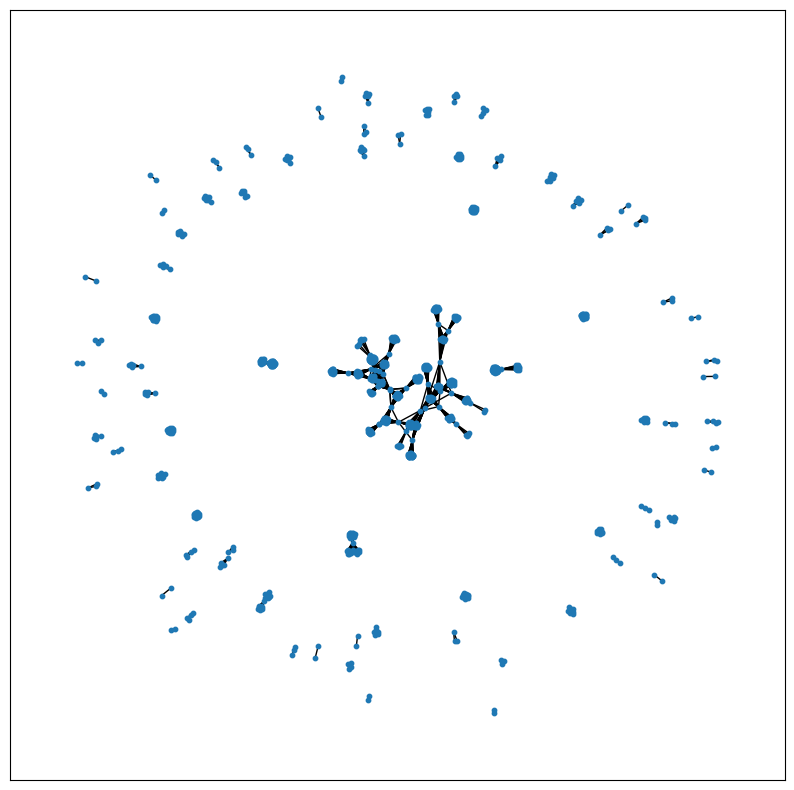

In [54]:
# Create a graph from the co_investment_counts DataFrame

G = nx.from_pandas_edgelist(co_investment_counts, 'name_x', 'name_y', ['CoInvestments'])

# Draw the graph
pos = nx.spring_layout(G)
#make the graph bigger
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos, with_labels=False, node_size=10, edge_color='black')
#add a heatmap
#nx.draw_networkx_edge_labels(G, pos, edge_labels=co_investment_counts['Distance'])

plt.show()


In [55]:
#Create a df_network_descrpiptive with the following variables:
#total_number_of_nodes
#total_number_of_edges
#average_degree
#median_degree
#average_clustering_coefficient
#median_clustering_coefficient
#average_shortest_path_length
#median_shortest_path_length
#average_eigenvector_centrality
#median_eigenvector_centrality
#average_betweenness_centrality
#median_betweenness_centrality
#average_closeness_centrality
#median_closeness_centrality
#average_pagerank
#median_pagerank

df_network_descriptive = pd.DataFrame(columns=("variable","value"))

#Calulate total number of nodes and add to df_network_descriptive with variable name "total_number_of_nodes"
total_number_of_nodes = len(G.nodes)
df_network_descriptive.loc[0] = ["total_number_of_nodes", total_number_of_nodes]

#Calulate total number of edges and add to df_network_descriptive with variable name "total_number_of_edges"
total_number_of_edges = len(G.edges)
df_network_descriptive.loc[1] = ["total_number_of_edges", total_number_of_edges]

#Calulate average degree and add to df_network_descriptive with variable name "average_degree"
average_degree = np.mean([G.degree(n) for n in G.nodes])
df_network_descriptive.loc[2] = ["average_degree", average_degree]

#Calulate median degree and add to df_network_descriptive with variable name "median_degree"
median_degree = np.median([G.degree(n) for n in G.nodes])
df_network_descriptive.loc[3] = ["median_degree", median_degree]

#Calulate average clustering coefficient and add to df_network_descriptive with variable name "average_clustering_coefficient"
average_clustering_coefficient = nx.average_clustering(G)
df_network_descriptive.loc[4] = ["average_clustering_coefficient", average_clustering_coefficient]

#Calulate median clustering coefficient and add to df_network_descriptive with variable name "median_clustering_coefficient"
median_clustering_coefficient = nx.average_clustering(G)
df_network_descriptive.loc[5] = ["median_clustering_coefficient", median_clustering_coefficient]


#Calulate average eigenvector centrality and add to df_network_descriptive with variable name "average_eigenvector_centrality"
average_eigenvector_centrality = np.mean([v for k,v in nx.eigenvector_centrality(G).items()])
df_network_descriptive.loc[8] = ["average_eigenvector_centrality", average_eigenvector_centrality]

#Calulate median eigenvector centrality and add to df_network_descriptive with variable name "median_eigenvector_centrality"
median_eigenvector_centrality = np.median([v for k,v in nx.eigenvector_centrality(G).items()])
df_network_descriptive.loc[9] = ["median_eigenvector_centrality", median_eigenvector_centrality]

#Calulate average betweenness centrality and add to df_network_descriptive with variable name "average_betweenness_centrality"
average_betweenness_centrality = np.mean([v for k,v in nx.betweenness_centrality(G).items()])
df_network_descriptive.loc[10] = ["average_betweenness_centrality", average_betweenness_centrality]

#Calulate median betweenness centrality and add to df_network_descriptive with variable name "median_betweenness_centrality"
median_betweenness_centrality = np.median([v for k,v in nx.betweenness_centrality(G).items()])
df_network_descriptive.loc[11] = ["median_betweenness_centrality", median_betweenness_centrality]

#Calulate average closeness centrality and add to df_network_descriptive with variable name "average_closeness_centrality"
average_closeness_centrality = np.mean([v for k,v in nx.closeness_centrality(G).items()])
df_network_descriptive.loc[12] = ["average_closeness_centrality", average_closeness_centrality]

#Calulate median closeness centrality and add to df_network_descriptive with variable name "median_closeness_centrality"
median_closeness_centrality = np.median([v for k,v in nx.closeness_centrality(G).items()])
df_network_descriptive.loc[13] = ["median_closeness_centrality", median_closeness_centrality]

#Calulate average pagerank and add to df_network_descriptive with variable name "average_pagerank"
average_pagerank = np.mean([v for k,v in nx.pagerank(G).items()])
df_network_descriptive.loc[14] = ["average_pagerank", average_pagerank]

#Calulate median pagerank and add to df_network_descriptive with variable name "median_pagerank"
median_pagerank = np.median([v for k,v in nx.pagerank(G).items()])
df_network_descriptive.loc[15] = ["median_pagerank", median_pagerank]

#Calculate average number of co-investments per angel and add to df_network_descriptive with variable name "average_number_of_co_investments_per_angel"
average_number_of_co_investments_per_angel = co_investment_counts['CoInvestments'].mean()
df_network_descriptive.loc[16] = ["average_number_of_co_investments_per_angel", average_number_of_co_investments_per_angel]


#Calculate median number of co-investments per angel and add to df_network_descriptive with variable name "median_number_of_co_investments_per_angel"
median_number_of_co_investments_per_angel = co_investment_counts['CoInvestments'].median()
df_network_descriptive.loc[17] = ["median_number_of_co_investments_per_angel", median_number_of_co_investments_per_angel]
#Calculate maximum number of co-investments
maximum_number_of_co_investments = co_investment_counts['CoInvestments'].max()
df_network_descriptive.loc[18] = ["maximum_number_of_co_investments", maximum_number_of_co_investments]


df_network_descriptive

,variable,value
0,total_number_of_nodes,9.610000e+02
1,total_number_of_edges,8.273000e+03
2,average_degree,1.721748e+01
3,median_degree,1.500000e+01
4,average_clustering_coefficient,9.397555e-01
5,median_clustering_coefficient,9.397555e-01
8,average_eigenvector_centrality,7.470891e-03
9,median_eigenvector_centrality,1.001372e-14
10,average_betweenness_centrality,4.576941e-04
11,median_betweenness_centrality,0.000000e+00


In [56]:
#check network for largest connected component
largest_cc = max(nx.connected_components(G), key=len)
import networkx as nx


# Calculate average shortest path length
avg_shortest_path_length = nx.average_shortest_path_length(largest_cc)
print(f"Average shortest path length: {avg_shortest_path_length}")

# Calculate average clustering coefficient
avg_clustering_coeff = nx.average_clustering(largest_cc)
print(f"Average clustering coefficient: {avg_clustering_coeff}")

import numpy as np
# Create a random graph with the same number of nodes and similar number of edges
random_graph = nx.gnm_random_graph(G.number_of_nodes(), G.number_of_edges())

# Calculate metrics for the random graph
random_avg_shortest_path_length = nx.average_shortest_path_length(random_graph)
random_avg_clustering_coeff = nx.average_clustering(random_graph)

# Compare metrics
print(f"Is the original graph a small-world graph? {np.all([(avg_clustering_coeff > random_avg_clustering_coeff), (avg_shortest_path_length <= random_avg_shortest_path_length)])}")

AttributeError: 'set' object has no attribute 'is_directed'

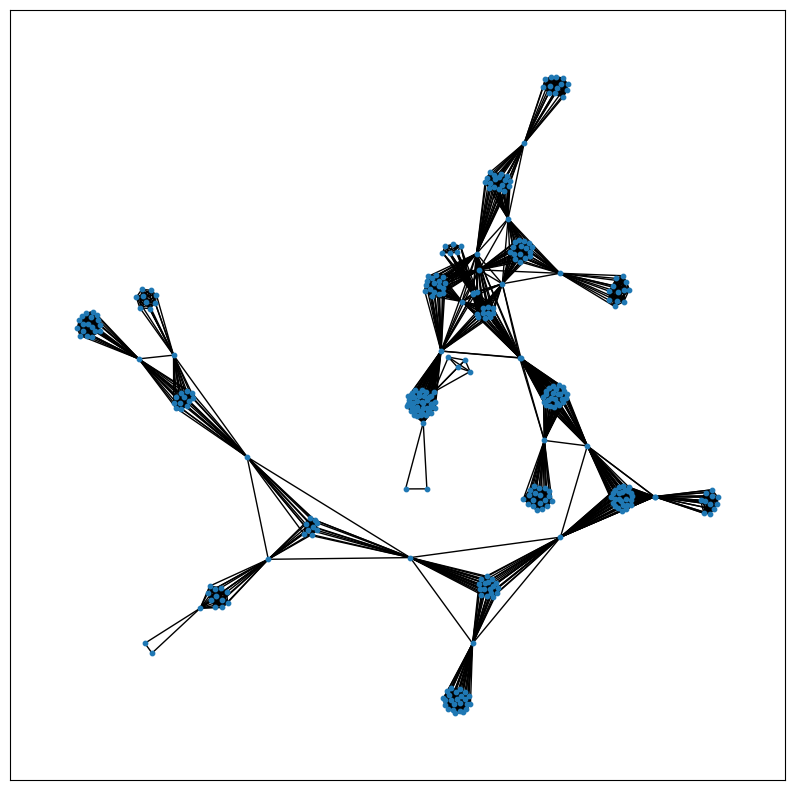

In [57]:
#plot largest subgraph
# Create a subgraph of the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
subgraph = G.subgraph(largest_cc)

# Draw the subgraph
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(10,10))
nx.draw_networkx(subgraph, pos, with_labels=False, node_size=10, edge_color='black')
plt.show()


## Simulating a network - 3



In [185]:
# Initialize an empty DataFrame to record the simulated investment relations
df_investment_rel_angel_startup_simulated = pd.DataFrame()

# Initialize a dictionary to keep track of the angels that have invested in each startup
angel_startup_map = {}

# Loop through each startup
for _, startup in df_startups.iterrows():
    x = 0
    # Initialize an empty list for each startup to keep track of its angels
    angel_startup_map[startup['company']] = []
    while x < startup['number_of_active_angels']:
        # Filter angels based on the criteria: active status, minimum 1 investment in the startup's industry, and same location as the startup
        eligible_angels = df_angels[(df_angels['status'] == "active") & 
                                     (df_angels[startup['industry']] >= 1) & 
                                     (df_angels[startup['location']+"_investments"] >= 1) &
                                     (~df_angels['name'].isin(angel_startup_map[startup['company']]))]
        
        # If there are eligible angels
        if not eligible_angels.empty:
            # Sample a random angel from the eligible angels
            sampled_angel = eligible_angels.sample(n=1)
        
            # Create a record of the investment relationship
            investment_record = pd.DataFrame({
                'company': [startup['company']],
                'angel': [sampled_angel.iloc[0]['name']],  # Assuming df_angels has a 'name' column
                'industry': [startup['industry']],  # Assuming df_startups has an 'industry' column
                'region': [sampled_angel.iloc[0]['location']],  # Assuming df_angels has a 'location' column
                'startup_location': [startup['location']],  # Assuming df_startups has a 'location' column
                'total_participation_in_percent': [sampled_angel.iloc[0]['total_participation']],  # Assuming df_angels has a 'total_participation' column
                'date_of_birth': [sampled_angel.iloc[0]['date_of_birth']]  # Assuming df_angels has a 'date_of_birth' column
            })
            
            # Append the record to the df_investment_rel_angel_startup DataFrame
            df_investment_rel_angel_startup_simulated = df_investment_rel_angel_startup_simulated.append(investment_record, ignore_index=True)
            
            # Add the angel to the list of drawn angels for the startup
            angel_startup_map[startup['company']].append(sampled_angel.iloc[0]['name'])
            
            x += 1
        else:
            # If no eligible angel is left, relax the location criterion and take an angel that fulfills all criteria except location
            eligible_angels = df_angels[(df_angels['status'] == "active") & 
                                     (df_angels[startup['industry']] >= 1) &
                                     (~df_angels['name'].isin(angel_startup_map[startup['company']]))]
            if not eligible_angels.empty:
                # Sample a random angel from the eligible angels
                sampled_angel = eligible_angels.sample(n=1)
        
                # Create a record of the investment relationship
                investment_record = pd.DataFrame({
                    'company': [startup['company']],
                    'angel': [sampled_angel.iloc[0]['name']],
                    'industry': [startup['industry']],
                    'region': [sampled_angel.iloc[0]['location']],
                    'total_participation_in_percent': [sampled_angel.iloc[0]['total_participation']],
                    'startup_location': [startup['location']],  # Assuming df_startups has a 'location' column
                    'date_of_birth': [sampled_angel.iloc[0]['date_of_birth']]
                })
            
                # Append the record to the df_investment_rel_angel_startup DataFrame
                df_investment_rel_angel_startup_simulated = df_investment_rel_angel_startup_simulated.append(investment_record, ignore_index=True)
            
                # Add the angel to the list of drawn angels for the startup
                angel_startup_map[startup['company']].append(sampled_angel.iloc[0]['name'])
            
                x += 1
            else:
                # If no eligible angel is still left, take any active and eligible angel regardless of industry
                eligible_angels = df_angels[(df_angels['status'] == "active") & 
                                     (~df_angels['name'].isin(angel_startup_map[startup['company']]))]
                if not eligible_angels.empty:
                    # Sample a random angel from the eligible angels
                    sampled_angel = eligible_angels.sample(n=1)
        
                    # Create a record of the investment relationship
                    investment_record = pd.DataFrame({
                        'company': [startup['company']],
                        'angel': [sampled_angel.iloc[0]['name']],
                        'industry': [startup['industry']],
                        'region': [sampled_angel.iloc[0]['location']],
                        'startup_location': [startup['location']],  # Assuming df_startups has a 'location' column
                        'total_participation_in_percent': [sampled_angel.iloc[0]['total_participation']],
                        'date_of_birth': [sampled_angel.iloc[0]['date_of_birth']]
                    })
            
                    # Append the record to the df_investment_rel_angel_startup DataFrame
                    df_investment_rel_angel_startup_simulated = df_investment_rel_angel_startup_simulated.append(investment_record, ignore_index=True)
            
                    # Add the angel to the list of drawn angels for the startup
                    angel_startup_map[startup['company']].append(sampled_angel.iloc[0]['name'])
            
                    x += 1
                else:
                    break

In [147]:
#calculate total sum of angel investors
total_number_of_angel_investors = len(df_investment_rel_angel_startup_simulated)
print(total_number_of_angel_investors)

272


In [60]:
#create a network graph from the simulated data
# Create a new DataFrame where each row represents a co-investment
co_investments_simulated = df_investment_rel_angel_startup_simulated.merge(df_investment_rel_angel_startup_simulated, on='company')

# Filter out rows where the investor is the same in both columns
co_investments_simulated = co_investments_simulated[co_investments_simulated['angel_x'] != co_investments_simulated['angel_y']]
# # Create a table with the number of co-investments for each pair of investors
co_investment_counts_simulated = co_investments_simulated.groupby(['angel_x', 'angel_y']).size().reset_index(name='CoInvestments')

#replace all spaces with _ in name_x
co_investment_counts_simulated['angel_x'] = co_investment_counts_simulated['angel_x'].str.replace(' ', '_')
co_investment_counts_simulated['angel_y'] = co_investment_counts_simulated['angel_y'].str.replace(' ', '_')

co_investment_counts_simulated.to_csv('co_investment_counts_simulated.csv', index=False)

#sort by number of co-investments
co_investment_counts_simulated = co_investment_counts_simulated.sort_values(by=['CoInvestments'], ascending=False)
print(co_investment_counts_simulated)




                                   angel_x  \
110                             Kupke_GmbH   
161                      ROMM_Holding_GmbH   
72   Entrepreneur_First_Operations_Limited   
61      Companisto_Trust_Service_XVII_GmbH   
210        Vsquared_Ventures_GmbH_&_Co._KG   
..                                     ...   
90                     Herr_Gopi_Kannappan   
91             Herr_Saravanan_Jaichandaran   
92             Herr_Saravanan_Jaichandaran   
93             Herr_Saravanan_Jaichandaran   
111                             Kupke_GmbH   

                                        angel_y  CoInvestments  
110                           ROMM_Holding_GmbH              5  
161                                  Kupke_GmbH              5  
72           Companisto_Trust_Service_XVII_GmbH              5  
61        Entrepreneur_First_Operations_Limited              5  
210    eNugget_Ventures_UG_(haftungsbeschrankt)              4  
..                                          ...          

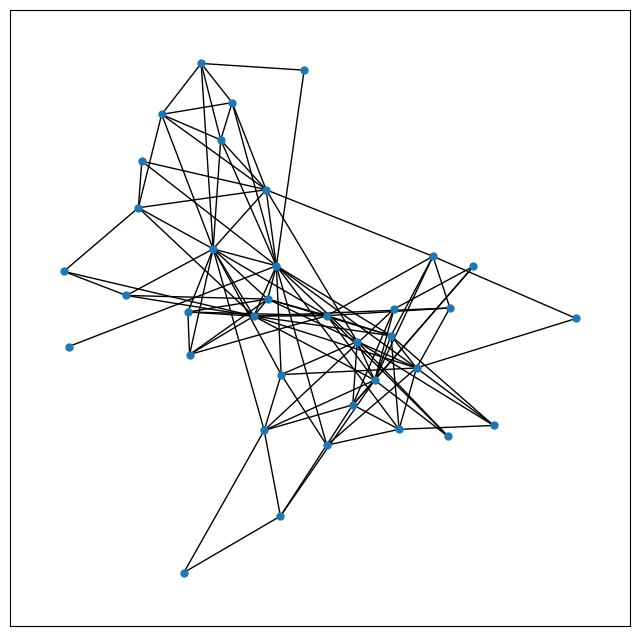

In [61]:
#plot network graph of simulated data
# Create a graph from the co_investment_counts DataFrame

G_simulated = nx.from_pandas_edgelist(co_investment_counts_simulated, 'angel_x', 'angel_y', ['CoInvestments'])

# Draw the graph
pos = nx.spring_layout(G_simulated)
#make the graph bigger
plt.figure(figsize=(8,8))
nx.draw_networkx(G_simulated, pos, with_labels=False, node_size=25, edge_color='black')
#add a heatmap
#nx.draw_networkx_edge_labels(G, pos, edge_labels=co_investment_counts['Distance'])
#save graph as png
plt.savefig('graphs/Simulated Network Graph.png')
plt.show()



In [62]:
#Draw a network graph of active angels only
# Create a new DataFrame where each row represents a co-investment

#only consider active angels in df_investment_rel_angel_startup
#match status from df_angels to df_investment_rel_angel_startup
#df_investment_rel_angel_startup = df_investment_rel_angel_startup.merge(df_angels[['name','status']], left_on='name', right_on='name', how='left')
#only consider active angels
df_investment_rel_angel_startup_active = df_investment_rel_angel_startup[df_investment_rel_angel_startup['status'] == 'active']

co_investments_active = df_investment_rel_angel_startup_active.merge(df_investment_rel_angel_startup_active, on='company')

# Filter out rows where the investor is the same in both columns
co_investments_active = co_investments_active[co_investments_active['name_x'] != co_investments_active['name_y']]
# # Create a table with the number of co-investments for each pair of investors
co_investment_counts_active = co_investments_active.groupby(['name_x', 'name_y']).size().reset_index(name='CoInvestments')

#replace all spaces with _ in name_x
co_investment_counts_active['name_x'] = co_investment_counts_active['name_x'].str.replace(' ', '_')
co_investment_counts_active['name_y'] = co_investment_counts_active['name_y'].str.replace(' ', '_')

co_investment_counts_active.to_csv('co_investment_counts_active.csv', index=False)

#sort by number of co-investments
co_investment_counts_active = co_investment_counts_active.sort_values(by=['CoInvestments'], ascending=False)
print(co_investment_counts_active)

                                       name_x  \
91                                  Lino_GmbH   
52      Entrepreneur_First_Operations_Limited   
68                Herr_Saravanan_Jaichandaran   
35         Companisto_Trust_Service_XVII_GmbH   
36         Companisto_Trust_Service_XVII_GmbH   
..                                        ...   
80                              La_Plata_GmbH   
82                              La_Plata_GmbH   
83                              La_Plata_GmbH   
84                              La_Plata_GmbH   
181  eNugget_Ventures_UG_(haftungsbeschrankt)   

                                         name_y  CoInvestments  
91                             PK_Projects_GmbH              2  
52     eNugget_Ventures_UG_(haftungsbeschrankt)              2  
68                      Herr_Ashok_Varadharajan              2  
35   Alexander_Ludwig_Friedrich_Christian_Fuchs              2  
36            Dr._Alfred_Heinrich_Georg_Spieker              2  
..                   

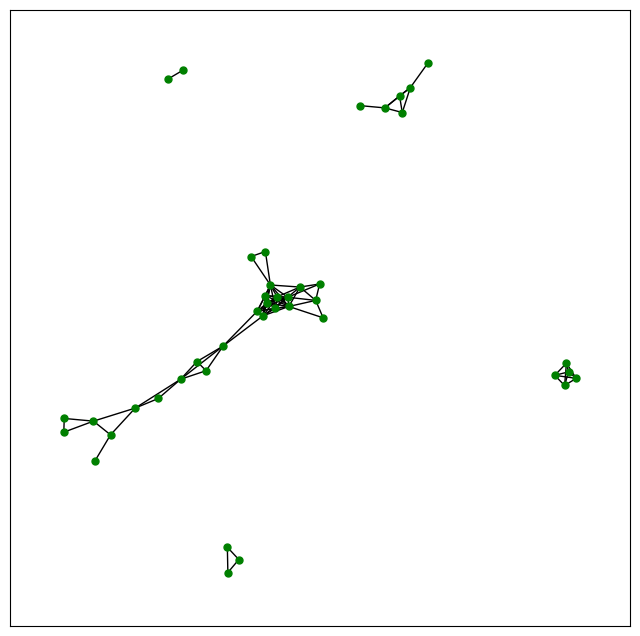

In [63]:
#plot network graph of active angels only
# Create a graph from the co_investment_counts DataFrame

G_active = nx.from_pandas_edgelist(co_investment_counts_active, 'name_x', 'name_y', ['CoInvestments'])

# Draw the graph
pos = nx.spring_layout(G_active)
#make the graph bigger
plt.figure(figsize=(8,8))
# make nodes bigger in the graph
nx.draw_networkx(G_active, pos, with_labels=False, node_size=25, edge_color='black', node_color='green')

#Save graph as png
plt.savefig('graphs/Active Angels Network Graph.png')

## Detecting communities - 4



In [64]:
from cdlib import algorithms
import networkx as nx
import igraph as ig

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'bayanpy', 'graph_tool', 'wurlitzer'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [65]:
# Was nutzen wir (angelehnt an bubna, aber deren walk trap ausgetaischt mit apparently more robus leiden algorithmus) considered
# - Leiden (von louvain zu Leiden)
# - minimum 5 community members
# - diameter of the community not larger than 1/4 of the diameter of the largest connected subgraph

#Community detection, where we remove all communitiues that are only composed of less than 5 nodes or which have a diameter larger than 1/4 of the network diameter


# Create a networkx graph (replace this with your graph)
def detectCommunities(G, method):
    # Apply the Walktrap algorithm to the graph
    if method == 'walktrap':
        coms = algorithms.walktrap(G)
    if method == 'louvain':
        coms = algorithms.louvain(G)
    if method == 'leiden':
        coms = algorithms.leiden(G)
    if method == 'infomap':
        coms = algorithms.infomap(G)


    print("The network has "+ str(G.number_of_nodes())+" nodes\n")
    print("We detected "+str(len(coms.communities))+' communities\n')

    print("The communities have those sizes respectively: \n")
    print([len(community) for community in coms.communities]) # print sizes of all remaining communities
    #remove all smaller than 5
    largest_cc = max(nx.connected_components(G), key=len)

    # Generate the subgraph of G consisting only of this component
    subgraph = G.subgraph(largest_cc)

    # Calculate and print the diameter of this subgraph
    network_diameter = nx.diameter(subgraph)
    # Filter out communities where the end-to-end diameter exceeds one-fourth that of the entire network
    #coms2.communities = [community for community in coms2.communities if nx.diameter(G.subgraph(community)) <= network_diameter / 2]

    coms.communities = [community for community in coms.communities if len(community) > 4]
    print("After removing all with less than 5 community members we have "+str(len(coms.communities))+" communities left. \n")

    return coms.communities


def comparison(G):
    communities_walktrap = detectCommunities(G_active,'walktrap')
    communities_louvain = detectCommunities(G_active,'louvain')
    communities_leiden = detectCommunities(G_active,'leiden')
    communities_infomap = detectCommunities(G_active,'infomap')

    # Create df that compares the number of communities across the different methods
    df_community_comparison = pd.DataFrame(columns=("method","number_of_communities"))
    df_community_comparison.loc[0] = ["walktrap", len(communities_walktrap)]
    df_community_comparison.loc[1] = ["louvain", len(communities_louvain)]
    df_community_comparison.loc[2] = ["leiden", len(communities_leiden)]
    df_community_comparison.loc[3] = ["infomap", len(communities_infomap)]
    return df_community_comparison

comparison_g_active = comparison(G_active)
comparison_g_simulated = comparison(G_simulated)

#Same thing for simulated data

# Create a networkx graph (replace this with your graph)
print(comparison_g_active)
print(comparison_g_simulated)


The network has 42 nodes

We detected 6 communities

The communities have those sizes respectively: 

[15, 11, 6, 5, 3, 2]
After removing all with less than 5 community members we have 4 communities left. 

The network has 42 nodes

We detected 6 communities

The communities have those sizes respectively: 

[15, 11, 6, 5, 3, 2]
After removing all with less than 5 community members we have 4 communities left. 

The network has 42 nodes

We detected 7 communities

The communities have those sizes respectively: 

[13, 11, 6, 5, 3, 2, 2]
After removing all with less than 5 community members we have 4 communities left. 

The network has 42 nodes

We detected 7 communities

The communities have those sizes respectively: 

[15, 6, 6, 5, 5, 3, 2]
After removing all with less than 5 community members we have 5 communities left. 

The network has 42 nodes

We detected 6 communities

The communities have those sizes respectively: 

[15, 11, 6, 5, 3, 2]
After removing all with less than 5 communit

In [66]:
#Girvan Newman based community detection

import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import modularity
 

def get_communities_Girvan_Newman(G):
    comp = girvan_newman(G)
    
    max_modularity = None
    optimal_partition = None
    for communities in comp:
        new_modularity = modularity(G, communities)

        if max_modularity is None or new_modularity > max_modularity:
            max_modularity = new_modularity
            optimal_partition = communities

        if max_modularity is not None and new_modularity < max_modularity:
            break
    # node_groups = []
    # for com in next(communities):
    #   node_groups.append(list(com))

    optimal_partition = [c for c in optimal_partition if len(c) > 4]
    largest_cc = max(nx.connected_components(G), key=len)

    subgraph = G.subgraph(largest_cc)
    network_diameter = nx.diameter(subgraph)
    # Filter out communities where the end-to-end diameter exceeds one-fourth that of the entire network
    optimal_partition = [c for c in optimal_partition if nx.diameter(G.subgraph(c)) < network_diameter/2]
    #transform optimal partition to list of lists
    optimal_partition = [list(c) for c in optimal_partition]
    return optimal_partition

communities_girvan_newman = get_communities_Girvan_Newman(G_active)
communities_girvan_newman_simulated = get_communities_Girvan_Newman(G_simulated)
print(communities_girvan_newman)
# communities_girvan_newman
# len(communities_girvan_newman)
# len(communities_girvan_newman_simulated)
# #return size of all communities
# community_sizes = [len(community) for community in communities_girvan_newman]
# community_sizes_simulated = [len(community) for community in communities_girvan_newman_simulated]   
# print(community_sizes_simulated)
# print(community_sizes)

[['Alvio_GmbH', 'Mercutio_GmbH', 'Sebastian_Schuon_Investments_GmbH', 'Lino_GmbH', 'Manoa_Ventures_GmbH', 'La_Plata_GmbH', 'PK_Projects_GmbH', 'Possible_Ventures_II_GmbH_&_Co._KG', 'ROMM_Holding_GmbH', 'Roskopf_Ventures_GmbH', 'Picus_Capital_GmbH', 'Wax_Venture_UG', 'DSR_Ventures_GmbH'], ['Herr_Gopi_Kannappan', 'Herr_Ajay_Prashanth_Narasaraju_Gajendraraju', 'Herr_Vijay_Pravin_Maharajan', 'Herr_Saravanan_Jaichandaran', 'Herr_Ashok_Varadharajan'], ['Vesta_Venture_Holding_GmbH', 'Kupke_GmbH', 'ARES_CAPITAL_ADVISERS_GmbH', 'Aurum_Impact_Invest_GmbH', 'Meinhardt_Ventures_UG_(haftungsbeschrankt)', 'AENU_Fund_SCA_SICAV-RAIF'], ['Rivus_Ventures_GmbH', 'HW_Capital_GmbH', 'Main_Incubator_GmbH', 'Atlantic_Food_Labs_Vintage_I_GmbH_&_Co._KG', 'Charles_Songhurst', 'WENVEST_Capital_GmbH', 'Simon_Capital_GmbH_&_Co._KG']]


In [177]:
df_investment_rel_angel_startup_simulated

,company,angel,industry,region,startup_location,total_participation_in_percent,date_of_birth
0,The Exploration Company,another.vc GmbH,energy_environment_infrastructure,Berlin,Stuttgart,0.022134,1980-01-14
1,Yababa GmbH_Berlin (Charlottenburg),AENU Fund SCA SICAV-RAIF,energy_environment_infrastructure,Berlin,Landshut,0.054671,1977-07-19
2,Yababa GmbH_Berlin (Charlottenburg),WENVEST Capital GmbH,energy_environment_infrastructure,Hamburg,Landshut,0.093130,1990-05-29
3,Friday Finance GmbH_Berlin (Charlottenburg),Bayern Kapital Innovationsfonds EFRE GmbH & Co...,technology_digital_services,Cologne,Landshut,0.020300,1951-03-11
4,Mondu GmbH_Berlin (Charlottenburg),Herr Ashok Varadharajan,technology_digital_services,Munich,Cologne,0.110419,1967-09-25
...,...,...,...,...,...,...,...
250,RAMPmedical GmbH_Berlin (Charlottenburg),AENU Fund SCA SICAV-RAIF,energy_environment_infrastructure,Berlin,Landshut,0.054671,1977-07-19
251,RAMPmedical GmbH_Berlin (Charlottenburg),Bayern Kapital Innovationsfonds EFRE GmbH & Co...,energy_environment_infrastructure,Cologne,Landshut,0.020300,1951-03-11
252,Cryptoticker.io GmbH_Berlin (Charlottenburg),another.vc GmbH,technology_digital_services,Berlin,Stuttgart,0.022134,1980-01-14
253,Cryptoticker.io GmbH_Berlin (Charlottenburg),Alexander Ludwig Friedrich Christian Fuchs,technology_digital_services,Stuttgart,Stuttgart,0.051761,1990-07-30


In [126]:
df_angels

,name,number_of_investments,gender,location,total_participation,date_of_birth,label,registry_details,Unnamed: 8,Unnamed: 9,...,Berlin_investments,Munich_investments,Landshut_investments,Hamburg_investments,Cologne_investments,Stuttgart_investments,industry_HHI_angel,status,age,community_membership
0,PK_Projects_GmbH,3,female,Hamburg,0.034040,1957-09-27,Angel,HRB 117075 B,NaN,NaN,...,1,0,0,0,0,0,25555.555556,active,64.304110,comm_1
1,Bayern_Kapital_Innovationsfonds_EFRE_GmbH_&_Co...,3,female,Landshut,0.139842,1996-09-06,VC,"AG Landshut, HRA 11166, Landshut",NaN,NaN,...,0,1,0,1,0,0,21111.111111,active,25.334247,no_community
2,Alvio_GmbH,3,male,Berlin,0.002100,1995-08-29,Angel,"AG Charlottenburg, HRB 181047 B",NaN,NaN,...,0,0,0,0,1,1,11111.111111,active,26.358904,comm_1
3,Rivus_Ventures_GmbH,2,male,Cologne,0.055710,1957-12-17,Angel,"Munchen, AG / local court of Munchen, HRB 267225",NaN,NaN,...,1,0,0,0,0,0,50000.000000,active,64.082192,comm_4
4,Mercutio_GmbH,2,male,Stuttgart,0.062041,1994-11-21,founder,HRB 107123,NaN,NaN,...,0,0,1,0,0,1,15000.000000,active,27.128767,comm_1
5,AKVaganza_Unternehmergesellschaft_(haftungsbes...,2,male,Landshut,0.101810,1961-09-05,founder,Amtsgericht Diisseldorf HRB 75419,NaN,NaN,...,1,1,0,0,0,0,55000.000000,active,60.361644,no_community
6,ROMM_Holding_GmbH,2,male,Berlin,0.121399,1975-12-27,VC,HRB 145775,NaN,NaN,...,0,1,0,0,0,1,35000.000000,active,46.043836,comm_1
7,Roskopf_Ventures_GmbH,2,female,Landshut,0.047736,1993-07-15,Angel,HRB 126690,NaN,NaN,...,1,0,1,0,1,0,12500.000000,active,28.482192,comm_1
8,WENVEST_Capital_GmbH,2,male,Hamburg,0.082898,1992-11-15,founder,NaN,NaN,NaN,...,0,0,0,0,1,0,22500.000000,active,29.145205,comm_4
9,Atlantic_Food_Labs_Vintage_GmbH_&_Co._KG,2,male,Landshut,0.094494,1963-08-02,VC,"AG Charlottenburg, HRA 58995 B",NaN,NaN,...,0,0,0,0,1,0,60000.000000,active,58.454795,no_community


## Analysis of similarity within communities - 5


In [190]:
#calculate investments per location per angel based on input df_angel and input df_investment_rel_angel_startup
#define funtion
def investments_per_location_per_angel(df_angel, df_investment_rel_angel_startup):
    #get list of all unique angels
    # rename column angel to name
    df_angel = df_angel.rename(columns={'angel':'name'})
    df_investment_rel_angel_startup = df_investment_rel_angel_startup.rename(columns={'angel':'name'})
    angels = df_angel['name'].unique()
    #create list of all locations in df_investment_rel_angel_startup
    locations = df_investment_rel_angel_startup['startup_location'].unique()
    #in front of every location write investments_
    locations_columns = [x for x in locations+ '_investments']
    #create empty df with columns name and one column for each location
    df_investments_per_location_per_angel = pd.DataFrame(columns=['name']+locations_columns)

    #loop through all angels
    for angel in angels:
        #create empty list to store investments per location
        investments_per_location = []
        #loop through all locations
        for location in locations:
            #calculate investments per location
            investments = len(df_investment_rel_angel_startup[(df_investment_rel_angel_startup['startup_location'] == location) & (df_investment_rel_angel_startup['name'] == angel)])
            #append to list
            investments_per_location.append(investments)
        #create df with name and investments per location
        df = pd.DataFrame([[angel]+investments_per_location], columns=['name']+locations_columns)
        #append to df_investments_per_location_per_angel
        df_investments_per_location_per_angel = df_investments_per_location_per_angel.append(df, ignore_index=True)


    return df_investments_per_location_per_angel

#run function
df_investments_per_location_per_angel = investments_per_location_per_angel(df_angels, df_investment_rel_angel_startup)
df_investments_per_location_per_angel_simulated = investments_per_location_per_angel(df_angels, df_investment_rel_angel_startup_simulated)
df_investments_per_location_per_angel




,name,Hamburg_investments,Munich_investments,Berlin_investments,Stuttgart_investments,Cologne_investments,Landshut_investments
0,PK Projects GmbH,0,1,0,0,0,2
1,Bayern Kapital Innovationsfonds EFRE GmbH & Co...,1,0,1,0,0,1
2,Alvio GmbH,1,0,0,1,0,1
3,Rivus Ventures GmbH,0,0,1,0,1,0
4,Mercutio GmbH,1,0,0,0,1,0
...,...,...,...,...,...,...,...
979,PDA Deutzclie one rales Digitalagentur GmbH,0,0,0,0,1,0
980,Dicki GmbH,0,0,0,0,1,0
981,Jiinger Invest UG,0,0,0,0,0,1
982,Lata Venture GmbH,0,0,1,0,0,0


In [195]:
#Generating a df_angels_simulated from df_angels active angels only

df_angels_simulated = df_angels[df_angels['status'] == 'active']
#rename name to angel
df_angels_simulated = df_angels_simulated.rename(columns={"name": "angel"})
#calculate number of investments from df_investment_rel_angel_startup_simulated
#calculate number of investments per angel
number_of_investments_per_angel = df_investment_rel_angel_startup_simulated.groupby(['angel']).size().reset_index(name='number_of_investments')

#drop column number_of_investments from df_angels_simulated
df_angels_simulated = df_angels_simulated.drop(columns=['number_of_investments'])
#overwrite number of investments in df_angels_simulated with number_of_investments_per_angel
df_angels_simulated = df_angels_simulated.merge(number_of_investments_per_angel, left_on='angel', right_on='angel', how='left')

#Calculate number of investments for all locations and add to df_angels_simulated
#Drop all investments columns from df_angels_simulated
#get all locations from df_investment_rel_angel_startup_simulated
locations_unique = df_investment_rel_angel_startup_simulated['startup_location'].unique()
#add _investments to all locations
locations_investments = [x for x in locations_unique+ '_investments']
df_angels_simulated = df_angels_simulated.drop(columns=locations_investments)
#calculate number of investments per location
number_of_investments_per_location = investments_per_location_per_angel(df_angels_simulated,df_investment_rel_angel_startup_simulated)
#merge with df_angels_simulated
df_angels_simulated = df_angels_simulated.merge(number_of_investments_per_location, left_on='angel', right_on='name', how='left')


df_angels_simulated

,angel,gender,location,total_participation,date_of_birth,label,registry_details,Unnamed: 8,Unnamed: 9,investment_entity,...,industry_HHI_angel,status,number_of_investments,name,Stuttgart_investments,Landshut_investments,Cologne_investments,Hamburg_investments,Berlin_investments,Munich_investments
0,PK Projects GmbH,male,Cologne,0.052364,1983-05-22,Angel,HRB 117075 B,NaN,NaN,person,...,16666.666667,active,17.0,PK Projects GmbH,9,0,5,0,3,0
1,Bayern Kapital Innovationsfonds EFRE GmbH & Co...,female,Cologne,0.020300,1951-03-11,VC,"AG Landshut, HRA 11166, Landshut",NaN,NaN,person,...,24444.444444,active,6.0,Bayern Kapital Innovationsfonds EFRE GmbH & Co...,0,6,0,0,0,0
2,Alvio GmbH,male,Munich,0.039406,1957-04-06,Angel,"AG Charlottenburg, HRB 181047 B",NaN,NaN,person,...,34444.444444,active,NaN,Alvio GmbH,0,0,0,0,0,0
3,Rivus Ventures GmbH,female,Cologne,0.040825,1978-07-20,Angel,"Munchen, AG / local court of Munchen, HRB 267225",NaN,NaN,person,...,67500.000000,active,NaN,Rivus Ventures GmbH,0,0,0,0,0,0
4,Mercutio GmbH,male,Cologne,0.072229,1979-06-05,founder,HRB 107123,NaN,NaN,person,...,57500.000000,active,3.0,Mercutio GmbH,0,0,0,0,3,0
5,AKVaganza Unternehmergesellschaft (haftungsbes...,female,Landshut,0.116015,1992-12-19,founder,Amtsgericht Diisseldorf HRB 75419,NaN,NaN,holding,...,62500.000000,active,13.0,AKVaganza Unternehmergesellschaft (haftungsbes...,0,0,0,13,0,0
6,ROMM Holding GmbH,male,Hamburg,0.135157,1984-10-24,VC,HRB 145775,NaN,NaN,person,...,57500.000000,active,8.0,ROMM Holding GmbH,0,0,8,0,0,0
7,Roskopf Ventures GmbH,male,Munich,0.052308,1971-01-26,Angel,HRB 126690,NaN,NaN,person,...,22500.000000,active,7.0,Roskopf Ventures GmbH,0,0,0,6,1,0
8,WENVEST Capital GmbH,female,Hamburg,0.093130,1990-05-29,founder,NaN,NaN,NaN,holding,...,67500.000000,active,4.0,WENVEST Capital GmbH,0,4,0,0,0,0
9,Atlantic Food Labs Vintage GmbH & Co. KG,female,Hamburg,0.015786,1953-09-11,VC,"AG Charlottenburg, HRA 58995 B",NaN,NaN,holding,...,42500.000000,active,NaN,Atlantic Food Labs Vintage GmbH & Co. KG,0,0,0,0,0,0


In [67]:
#prepping the data

#add a column to df angels that contains the community of each angel
df_angels['community_membership'] = None

#in df angels replace all spaces in name column with _
df_angels['name'] = df_angels['name'].str.replace(' ', '_')
communities = communities_girvan_newman
print(communities)
print(df_angels.iloc[1]['name'])
# Ensure the column exists
if 'community_membership' not in df_angels.columns:
    df_angels['community_membership'] = None

# For each angel, see if they are in a community and if so add the community number to the df
for i in range(len(df_angels)):
    for j in range(len(communities)):
        try:
            if df_angels.iloc[i]['name'] in communities[j]:
                comm_memb = "comm_"+str(j+1)
                df_angels.at[i,'community_membership'] = comm_memb
        except KeyError:
            print(f"KeyError: 'name' not found in df_angels at index {i}")
        except Exception as e:
            print(f"An error occurred: {e}")

#for everyone with entry None in community_membership column, add them to a community called "no_community"
df_angels['community_membership'] = df_angels['community_membership'].fillna('no_community')

#show active angels
df_angels[df_angels['status'] == 'active']


[['Alvio_GmbH', 'Mercutio_GmbH', 'Sebastian_Schuon_Investments_GmbH', 'Lino_GmbH', 'Manoa_Ventures_GmbH', 'La_Plata_GmbH', 'PK_Projects_GmbH', 'Possible_Ventures_II_GmbH_&_Co._KG', 'ROMM_Holding_GmbH', 'Roskopf_Ventures_GmbH', 'Picus_Capital_GmbH', 'Wax_Venture_UG', 'DSR_Ventures_GmbH'], ['Herr_Gopi_Kannappan', 'Herr_Ajay_Prashanth_Narasaraju_Gajendraraju', 'Herr_Vijay_Pravin_Maharajan', 'Herr_Saravanan_Jaichandaran', 'Herr_Ashok_Varadharajan'], ['Vesta_Venture_Holding_GmbH', 'Kupke_GmbH', 'ARES_CAPITAL_ADVISERS_GmbH', 'Aurum_Impact_Invest_GmbH', 'Meinhardt_Ventures_UG_(haftungsbeschrankt)', 'AENU_Fund_SCA_SICAV-RAIF'], ['Rivus_Ventures_GmbH', 'HW_Capital_GmbH', 'Main_Incubator_GmbH', 'Atlantic_Food_Labs_Vintage_I_GmbH_&_Co._KG', 'Charles_Songhurst', 'WENVEST_Capital_GmbH', 'Simon_Capital_GmbH_&_Co._KG']]
Bayern_Kapital_Innovationsfonds_EFRE_GmbH_&_Co._KG


,name,number_of_investments,gender,location,total_participation,date_of_birth,label,registry_details,Unnamed: 8,Unnamed: 9,...,Berlin_investments,Munich_investments,Landshut_investments,Hamburg_investments,Cologne_investments,Stuttgart_investments,industry_HHI_angel,status,age,community_membership
0,PK_Projects_GmbH,3,female,Hamburg,0.034040,1957-09-27,Angel,HRB 117075 B,NaN,NaN,...,1,0,0,0,0,0,25555.555556,active,64.304110,comm_1
1,Bayern_Kapital_Innovationsfonds_EFRE_GmbH_&_Co...,3,female,Landshut,0.139842,1996-09-06,VC,"AG Landshut, HRA 11166, Landshut",NaN,NaN,...,0,1,0,1,0,0,21111.111111,active,25.334247,no_community
2,Alvio_GmbH,3,male,Berlin,0.002100,1995-08-29,Angel,"AG Charlottenburg, HRB 181047 B",NaN,NaN,...,0,0,0,0,1,1,11111.111111,active,26.358904,comm_1
3,Rivus_Ventures_GmbH,2,male,Cologne,0.055710,1957-12-17,Angel,"Munchen, AG / local court of Munchen, HRB 267225",NaN,NaN,...,1,0,0,0,0,0,50000.000000,active,64.082192,comm_4
4,Mercutio_GmbH,2,male,Stuttgart,0.062041,1994-11-21,founder,HRB 107123,NaN,NaN,...,0,0,1,0,0,1,15000.000000,active,27.128767,comm_1
5,AKVaganza_Unternehmergesellschaft_(haftungsbes...,2,male,Landshut,0.101810,1961-09-05,founder,Amtsgericht Diisseldorf HRB 75419,NaN,NaN,...,1,1,0,0,0,0,55000.000000,active,60.361644,no_community
6,ROMM_Holding_GmbH,2,male,Berlin,0.121399,1975-12-27,VC,HRB 145775,NaN,NaN,...,0,1,0,0,0,1,35000.000000,active,46.043836,comm_1
7,Roskopf_Ventures_GmbH,2,female,Landshut,0.047736,1993-07-15,Angel,HRB 126690,NaN,NaN,...,1,0,1,0,1,0,12500.000000,active,28.482192,comm_1
8,WENVEST_Capital_GmbH,2,male,Hamburg,0.082898,1992-11-15,founder,NaN,NaN,NaN,...,0,0,0,0,1,0,22500.000000,active,29.145205,comm_4
9,Atlantic_Food_Labs_Vintage_GmbH_&_Co._KG,2,male,Landshut,0.094494,1963-08-02,VC,"AG Charlottenburg, HRA 58995 B",NaN,NaN,...,0,0,0,0,1,0,60000.000000,active,58.454795,no_community


In [68]:
def calculate_hhi(market_shares):
    """
    Calculate Herfindahl-Hirschmann Index (HHI)
    
    Parameters:
    market_shares (list): List of market shares for each company
    
    Returns:
    hhi (float): Calculated HHI index
    """
    hhi = sum([share**2 for share in market_shares])

    return hhi

# Example usage:
market_shares = [30, 30, 20, 20]  # Market shares in percent
hhi = calculate_hhi(market_shares)
print(f"The HHI is {hhi}")

The HHI is 2600


In [88]:
df_angels

,name,number_of_investments,gender,location,total_participation,date_of_birth,label,registry_details,Unnamed: 8,Unnamed: 9,...,Berlin_investments,Munich_investments,Landshut_investments,Hamburg_investments,Cologne_investments,Stuttgart_investments,industry_HHI_angel,status,age,community_membership
0,PK_Projects_GmbH,3,female,Hamburg,0.034040,1957-09-27,Angel,HRB 117075 B,NaN,NaN,...,1,0,0,0,0,0,25555.555556,active,64.304110,comm_1
1,Bayern_Kapital_Innovationsfonds_EFRE_GmbH_&_Co...,3,female,Landshut,0.139842,1996-09-06,VC,"AG Landshut, HRA 11166, Landshut",NaN,NaN,...,0,1,0,1,0,0,21111.111111,active,25.334247,no_community
2,Alvio_GmbH,3,male,Berlin,0.002100,1995-08-29,Angel,"AG Charlottenburg, HRB 181047 B",NaN,NaN,...,0,0,0,0,1,1,11111.111111,active,26.358904,comm_1
3,Rivus_Ventures_GmbH,2,male,Cologne,0.055710,1957-12-17,Angel,"Munchen, AG / local court of Munchen, HRB 267225",NaN,NaN,...,1,0,0,0,0,0,50000.000000,active,64.082192,comm_4
4,Mercutio_GmbH,2,male,Stuttgart,0.062041,1994-11-21,founder,HRB 107123,NaN,NaN,...,0,0,1,0,0,1,15000.000000,active,27.128767,comm_1
5,AKVaganza_Unternehmergesellschaft_(haftungsbes...,2,male,Landshut,0.101810,1961-09-05,founder,Amtsgericht Diisseldorf HRB 75419,NaN,NaN,...,1,1,0,0,0,0,55000.000000,active,60.361644,no_community
6,ROMM_Holding_GmbH,2,male,Berlin,0.121399,1975-12-27,VC,HRB 145775,NaN,NaN,...,0,1,0,0,0,1,35000.000000,active,46.043836,comm_1
7,Roskopf_Ventures_GmbH,2,female,Landshut,0.047736,1993-07-15,Angel,HRB 126690,NaN,NaN,...,1,0,1,0,1,0,12500.000000,active,28.482192,comm_1
8,WENVEST_Capital_GmbH,2,male,Hamburg,0.082898,1992-11-15,founder,NaN,NaN,NaN,...,0,0,0,0,1,0,22500.000000,active,29.145205,comm_4
9,Atlantic_Food_Labs_Vintage_GmbH_&_Co._KG,2,male,Landshut,0.094494,1963-08-02,VC,"AG Charlottenburg, HRA 58995 B",NaN,NaN,...,0,0,0,0,1,0,60000.000000,active,58.454795,no_community


In [158]:
df_angels_test = df_angels[df_angels['status'] == 'active']
 #get subset of angels in comm_1

def get_geographical_HHI(df_angels_comm_1):
    #get all communities
    communities = df_angels_comm_1['community_membership'].unique()
    #create df with columns community and HHI

    df_community_HHI = pd.DataFrame(columns=("community","geographical_HHI"))
    print(df_community_HHI)

    #go thorugh communities, create subsets
    input = df_angels_comm_1
    for community in communities:

        #get subset of angels in comm_1
  
        temp2 = input[input['community_membership'] == community]
        # add row for community to df_community_HHI

        #count how many angels there are per location
        temp = temp2.groupby(['location']).size().reset_index(name='count')
        
        #calculate share per location and make whole number sform it
        temp['share'] = temp['count']/temp['count'].sum()*100
       
        #get shares only as list
        shares = temp['share'].tolist()
        #calculate HHI
        hhi = calculate_hhi(shares)
   
        #save HHI community pair in df
        df_community_HHI.loc[len(df_community_HHI)] = [community, hhi]
        
        #add community to df\

    return df_community_HHI
        
test = get_geographical_HHI(df_angels_test)
test

Empty DataFrame
Columns: [community, geographical_HHI]
Index: []


,community,geographical_HHI
0,comm_1,2071.005917
1,no_community,2088.888889
2,comm_4,4285.714286
3,comm_3,2777.777778
4,comm_2,5200.000000


In [116]:
#create df with all communities and the additional columns average age, average industry HHI
#for everyone with entry None in community_membership column, add them to a community called "no_community"

def get_community_statistics(df_angels):
    # Create a new DataFrame where each row represents a community
    df_communities = pd.DataFrame(columns=("community","average_age","average_eigenvector_centrality_across_angels","average_number_of_investments_per_angel_in_community"))
    df_communities['community'] = df_angels['community_membership'].unique()

    #calculate average age of angels in each community and add to df_communities with variable name "average_age"
    for i in range(len(df_communities)):
        df_communities.at[i,'average_age'] = df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']]['age'].mean()

    #calculate average industry HHI of angels in each community and add to df_communities with variable name "average_industry_HHI"
    for i in range(len(df_communities)):
        df_communities.at[i,'average_industry_HHI'] = df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']]['industry_HHI_angel'].mean()

    #calculate average eigenvector centrality of angels in each community and add to df_communities with variable name "average_eigenvector_centrality_across_angels"
    for i in range(len(df_communities)):
        df_communities.at[i,'average_eigenvector_centrality_across_angels'] = df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']]['eigenvector_centrality'].mean()

    #Calculate average number of investments in each community and add to df_communities with variable name "average_number_of_investments_per_angel_in_community"
    for i in range(len(df_communities)):
        df_communities.at[i,'average_number_of_investments_per_angel_in_community'] = df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']]['number_of_investments'].mean()

    #add number of angels in each community
    for i in range(len(df_communities)):
        df_communities.at[i,'number_of_angels_in_community'] = len(df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']])
    #Calculate geographic HHI for each community
    # determine the number of angels per location in each community
    df_geographic_HHI = get_geographical_HHI(df_angels)
    #add geographic HHI to df_communities

    df_communities = df_communities.merge(df_geographic_HHI, left_on='community', right_on='community', how='left')
    

    return df_communities

#Calculate geographic HHI for each community


df_communities_statistics = get_community_statistics(df_angels)
df_communities_statistics

Empty DataFrame
Columns: [community, geographical_HHI]
Index: []


,community,average_age,average_eigenvector_centrality_across_angels,average_number_of_investments_per_angel_in_community,average_industry_HHI,number_of_angels_in_community,geographical_HHI
0,comm_1,44.62824,0.571394,2.153846,39743.589744,13.0,2071.005917
1,no_community,45.969132,0.474168,2.066667,38574.074074,15.0,2088.888889
2,comm_4,50.104501,0.460581,2.0,31071.428571,7.0,4285.714286
3,comm_3,59.582192,0.663625,2.0,59583.333333,6.0,2777.777778
4,comm_2,46.848767,0.333581,2.0,47500.000000,5.0,5200.000000


In [227]:

import os
from supabase import create_client, Client
from dotenv import load_dotenv

load_dotenv("../.env")
#get URL from environment variable

url: str = os.environ.get("SUPABASE_URL")
key: str = os.environ.get("SUPABASE_KEY")
supabase: Client = create_client(url, key)


response = supabase.table('startups').insert({"startup_id": 900000, "startup_name": "Tacto"}).execute()

2024-01-17 11:47:06,631:INFO - HTTP Request: POST https://vzaliuejopysgkdewpip.supabase.co/rest/v1/startups "HTTP/1.1 201 Created"


In [231]:
import requests

file_path = "output/Tanso Technologies GmbH_München.pdf"
bucket_name = "shareholder_documents"
storage_path = "Tacto/2021_06_01_Tanso Technologies GmbH_Munchen.pdf"

# Open the file in binary mode
with open(file_path, 'rb') as f:
    supabase.storage.from_("shareholder_documents").upload(file=f,path=storage_path, file_options={"content-type": "pdf"})

# save storage path to startup table
table_name = "startups"
file_link_column = "link_shareholder_file_2021"

# Construct the path to the file in Supabase Storage
file_link = f"https://{bucket_name}.supabase.co/{storage_path}"

# Define the startup_id
startup_id = 7

# Update the table
response = supabase.table(table_name).update({file_link_column: file_link}).match({'startup_id': startup_id}).execute()

2024-01-17 11:55:04,938:INFO - HTTP Request: POST https://vzaliuejopysgkdewpip.supabase.co/storage/v1/object/shareholder_documents/Tacto/2021_06_01_Tanso%20Technologies%20GmbH_Munchen.pdf "HTTP/1.1 200 OK"
2024-01-17 11:55:05,205:INFO - HTTP Request: PATCH https://vzaliuejopysgkdewpip.supabase.co/rest/v1/startups?startup_id=eq.7 "HTTP/1.1 200 OK"
